# Case Study
### This study aims to compare 5 machine learning algorithms on the prediction of DEATH EVENT in the Heart Failure Clinical Records

# Aims and Objectives
## Aims
### The aim of this study is to build optimised machine learning model to predict death events from the heart failure clinical records
## Objectives
### 1. Build a non-optimized prediction model to predict death event from heart failure clinical records
### 2. Build an optimized prediction model to predict death event from heart failure clinical records
### 3. Evaluate and compare the results from Objective one and Objective 2 using Accuracy, F1-Score, Precision, Recall, and RUC-Curve

# Methodology
### Dataset Collection, Data Preprocessing, Exploratory Data Analysis, Feature Selection, Model Implementation, Model Comparison

# Ethical Issues
### The dataset was gotten from kaggle public repository. The dataset contains patient clinical records, however, it doesn't contain patient names. This data will only be used for educatonal research purposes and the information in this dataset will not be used for any other purpose other than research.

# installing missing Libraries

In [2]:
pip install imblearn

     ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
     -------------------------------------- 258.3/258.3 kB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install mglearn

     ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
     ------------------------------------- 581.4/581.4 kB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Libraries

In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.model_selection import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.datasets import *
import mglearn
from sklearn.decomposition import PCA
from sklearn.feature_selection import *
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import *
from sklearn import *
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *

# Investigating the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("dataset.csv")

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,No,748.0,No,45,No,263358.03,1.3,137,Male,Yes,88.0,No
1,65.0,No,56.0,No,25,No,305000.00,5.0,130,Male,No,207.0,No
2,45.0,No,582.0,Yes,38,No,319000.00,0.9,140,Female,No,244.0,No
3,60.0,Yes,754.0,Yes,40,Yes,328000.00,1.2,126,Male,No,90.0,No
4,95.0,Yes,582.0,No,30,No,461000.00,2.0,132,Male,No,50.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,No,582.0,Yes,55,No,543000.00,1.0,132,Female,No,250.0,No
4996,60.0,Yes,582.0,No,30,Yes,127000.00,0.9,145,Female,No,95.0,No
4997,95.0,Yes,112.0,No,40,Yes,196000.00,1.0,138,Female,No,24.0,Yes
4998,65.0,Yes,160.0,Yes,20,No,327000.00,2.7,116,Female,No,8.0,Yes


# DATA STRUCTURE AND STATISTICAL ANALYSIS

### The dataset comprise of both categorical and numerical features. The features include; Age, Anaemia, creatinie_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, Platelets, Serum_creatinine, serum_sodium, sex, smoking, time and Death_Event. The statistical analysis gives brief insight into the data. 

In [4]:
# Previewing the first 8 rows of the dataset
df.head(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,No,748.0,No,45,No,263358.03,1.3,137,Male,Yes,88.0,No
1,65.0,No,56.0,No,25,No,305000.00,5.0,130,Male,No,207.0,No
2,45.0,No,582.0,Yes,38,No,319000.00,0.9,140,Female,No,244.0,No
3,60.0,Yes,754.0,Yes,40,Yes,328000.00,1.2,126,Male,No,90.0,No
4,95.0,Yes,582.0,No,30,No,461000.00,2.0,132,Male,No,50.0,Yes
5,70.0,No,232.0,Yes,30,No,302000.00,1.2,132,Male,No,210.0,No
6,63.0,Yes,122.0,Yes,60,No,172000.00,1.2,145,Female,No,147.0,No
7,70.0,Yes,171.0,No,50,Yes,358000.00,0.9,141,Female,No,196.0,NaN


In [5]:
# Previewing the last 8 rows of the dataset
df.tail(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4992,65.0,Yes,335.0,No,35,Yes,235000.0,0.8,136,Female,No,120.0,No
4993,60.0,Yes,582.0,No,30,Yes,127000.0,0.9,145,Female,No,95.0,No
4994,65.0,Yes,160.0,Yes,20,No,327000.0,2.7,116,Female,No,8.0,Yes
4995,45.0,No,582.0,Yes,55,No,543000.0,1.0,132,Female,No,250.0,No
4996,60.0,Yes,582.0,No,30,Yes,127000.0,0.9,145,Female,No,95.0,No
4997,95.0,Yes,112.0,No,40,Yes,196000.0,1.0,138,Female,No,24.0,Yes
4998,65.0,Yes,160.0,Yes,20,No,327000.0,2.7,116,Female,No,8.0,Yes
4999,40.0,No,244.0,No,45,Yes,275000.0,0.9,140,Female,No,174.0,No


In [6]:
# Previewing the shape of the Dataset
df.shape

(5000, 13)

In [7]:
# Checking the size of the dataset
df.size

65000

In [8]:
# Getting the info of the dataset including the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       4954 non-null   float64
 1   anaemia                   4998 non-null   object 
 2   creatinine_phosphokinase  4998 non-null   float64
 3   diabetes                  4987 non-null   object 
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       4990 non-null   object 
 6   platelets                 4985 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       4987 non-null   object 
 10  smoking                   4991 non-null   object 
 11  time                      4999 non-null   float64
 12  DEATH_EVENT               4996 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 507.9+ KB


In [9]:
#Getting the statistical info of the dataset
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,4954.000000,4998.000000,5000.000000,4985.000000,5000.000000,5000.000000,4999.000000
mean,60.285224,586.583834,37.734600,265112.943200,1.369106,136.808200,130.684937
std,11.751378,976.883268,11.514855,98010.646079,1.009750,4.464236,77.332445
min,40.000000,23.000000,14.000000,25100.000000,0.500000,113.000000,4.000000
25%,50.000000,121.000000,30.000000,216000.000000,0.900000,134.000000,74.000000
50%,60.000000,248.000000,38.000000,263358.030000,1.100000,137.000000,113.000000
75%,69.000000,582.000000,45.000000,310000.000000,1.400000,140.000000,201.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.400000,148.000000,285.000000


# DATA PREPROCESSING

### The data is cleaned, and prepared for modelling. This entails checking for missing values and dealing with it, checking for outliers and dealing with it.  

In [10]:
#Checking to see if their are missing values in the dataset
df.isnull().sum()

age                         46
anaemia                      2
creatinine_phosphokinase     2
diabetes                    13
ejection_fraction            0
high_blood_pressure         10
platelets                   15
serum_creatinine             0
serum_sodium                 0
sex                         13
smoking                      9
time                         1
DEATH_EVENT                  4
dtype: int64

In [11]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [12]:
# Get columns with missing values

missing_values_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
print(f"Columns with missing values are: {missing_values_columns}")

Columns with missing values are: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'time', 'DEATH_EVENT']


In [13]:
# Get the percentage of missing values in each column

percentage_missing_values = (df.isnull().mean()*100).round(1)
print("Percentage of missing values in each columns are: ") 
print(percentage_missing_values.apply(
lambda x: f"{x}%"))

Percentage of missing values in each columns are: 
age                         0.9%
anaemia                     0.0%
creatinine_phosphokinase    0.0%
diabetes                    0.3%
ejection_fraction           0.0%
high_blood_pressure         0.2%
platelets                   0.3%
serum_creatinine            0.0%
serum_sodium                0.0%
sex                         0.3%
smoking                     0.2%
time                        0.0%
DEATH_EVENT                 0.1%
dtype: object


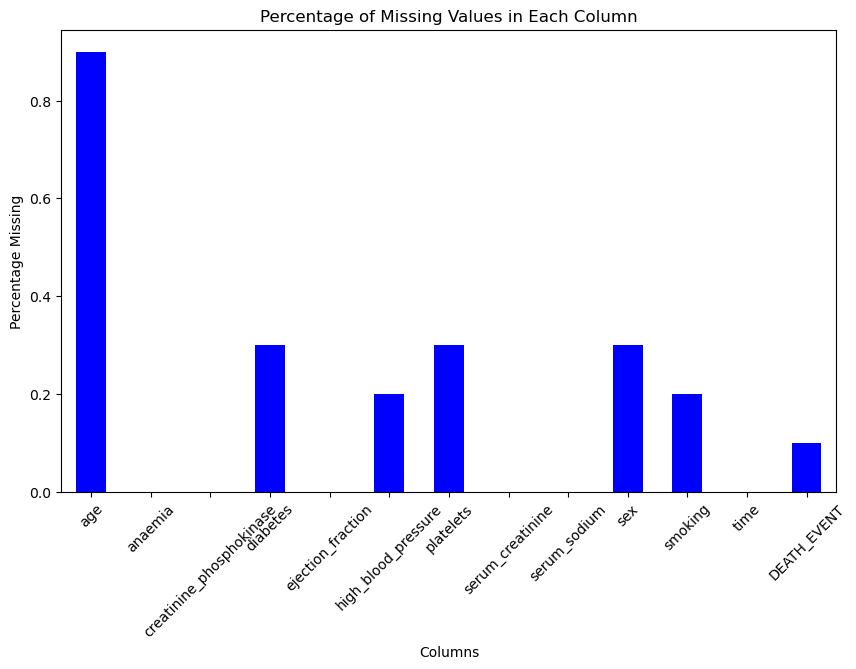

In [14]:
# Plotting the data
plt.figure(figsize=(10, 6))
percentage_missing_values.plot(kind='bar', color='blue')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.show()

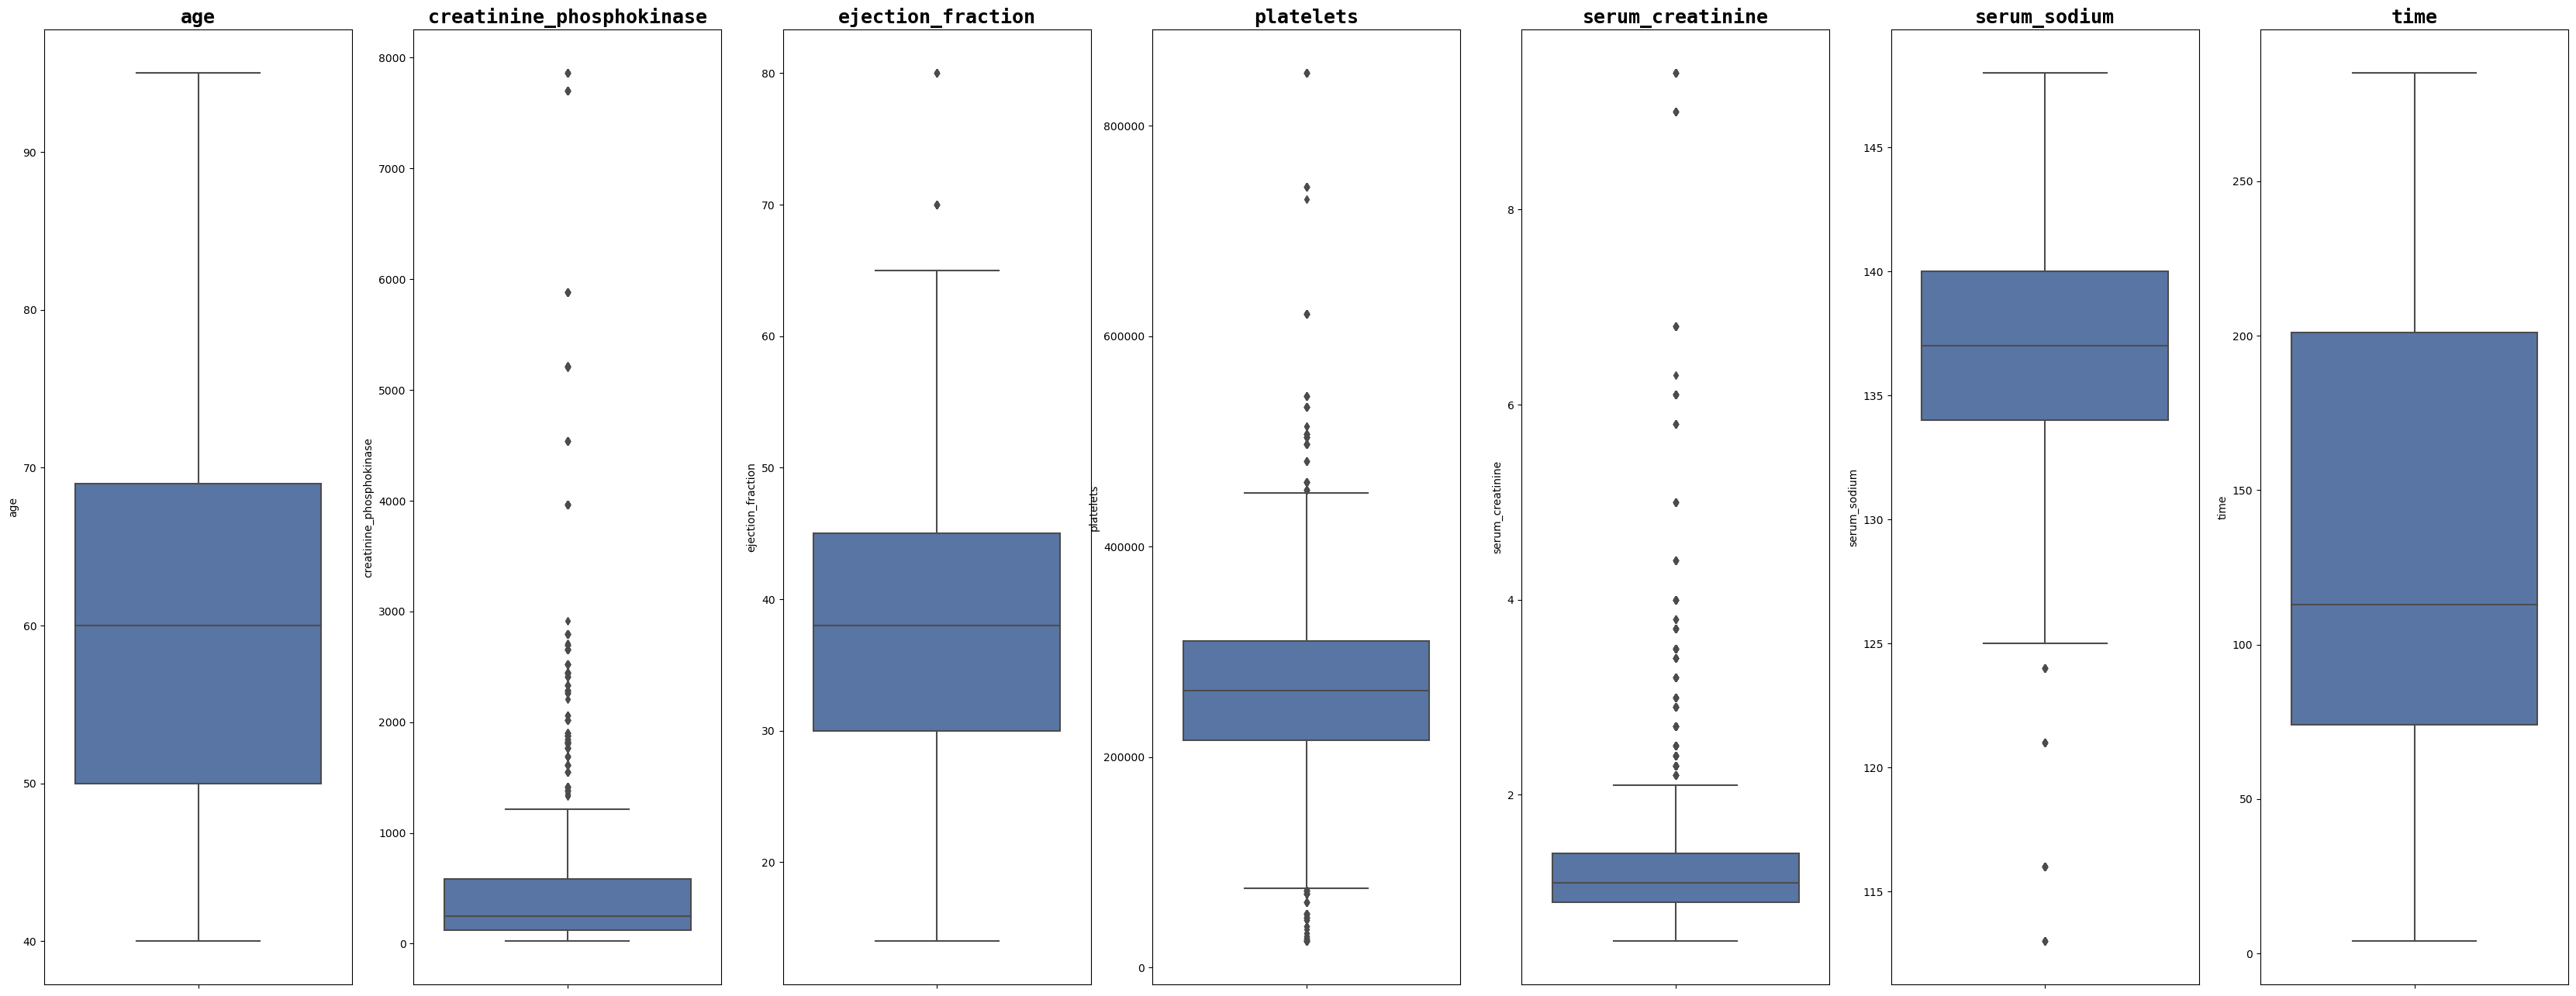

In [15]:
# Check for outliers in numerical columns

numerical_cols = ['age', 'creatinine_phosphokinase', 
                  'ejection_fraction', 'platelets', 
                  'serum_creatinine', 'serum_sodium', 'time'  ] 

fig, ax = plt.subplots(1, 7, figsize = (42, 16))

for i, col in enumerate(numerical_cols):
    s = sns.boxplot(data = df, y = col, ax = ax[i], palette = "deep")
    s.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

# EXPLORATORY DATA ANALYSIS

In [16]:
# check to see how many categorical columns are there in the dataset

cate = df.select_dtypes(include='object').columns
print(f"There are {len(cate)} categorical columns in the dataset")

There are 6 categorical columns in the dataset


In [17]:
# Check number of unique values in each categorical columns

for i in cate:
    print(f"The number of unique values in {i} are: {df.loc[:,i].nunique()}")

The number of unique values in anaemia are: 2
The number of unique values in diabetes are: 2
The number of unique values in high_blood_pressure are: 2
The number of unique values in sex are: 2
The number of unique values in smoking are: 2
The number of unique values in DEATH_EVENT are: 2


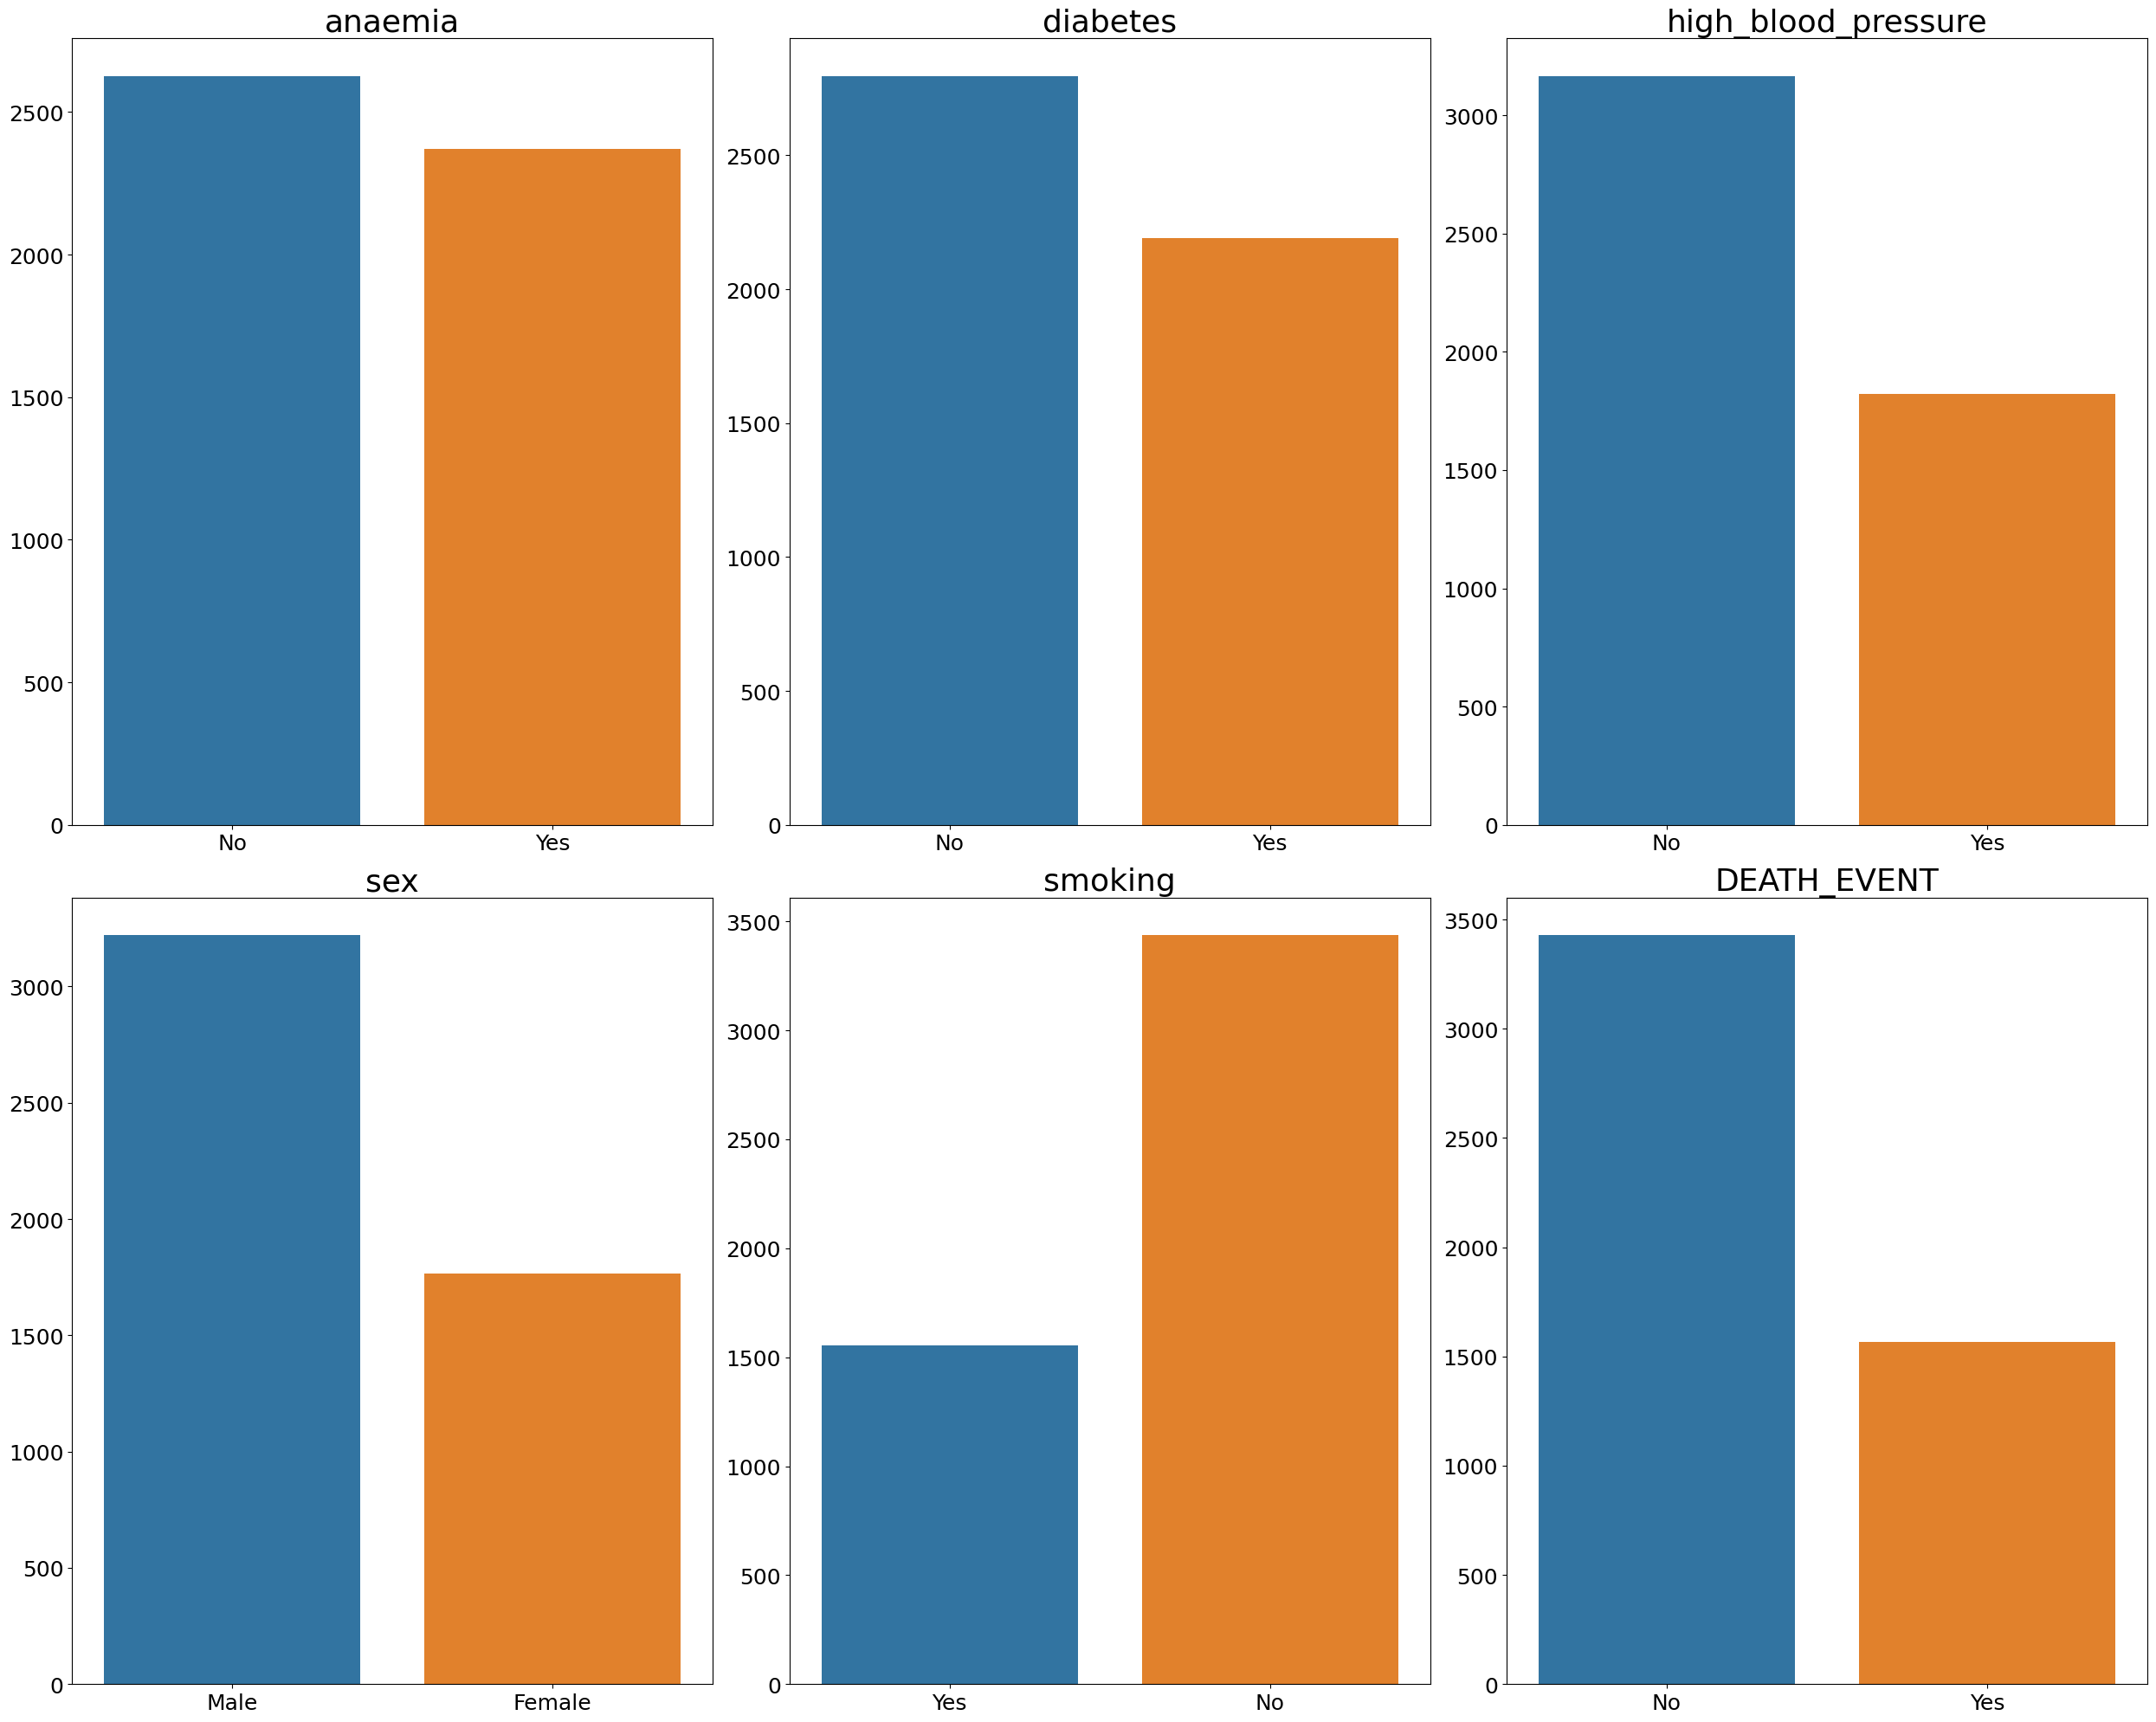

In [18]:
# visualizing the distribution of the categorical columns

number_plots = len(cate)
number_cols = 3  
number_row = number_plots // number_cols + int(number_plots % number_cols > 0)

fig, axes = plt.subplots(number_row, number_cols, figsize=(25, number_row * 10))  # Adjust height accordingly
axes = axes.flatten()

for i, col in enumerate(cate):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize = 26)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=0, labelsize=18)
    axes[i].tick_params(axis='y', labelsize=18)

for i in range(number_plots, number_row * number_cols):
    axes[i].set_visible(False)

fig.tight_layout()
plt.show()

In [19]:
# Visualising the distribution of numerical values

numerical_values_col = df.select_dtypes(include=np.number).columns
print(f"The total numerical columns in the dataset is: {len(numerical_values_col)}")

The total numerical columns in the dataset is: 7


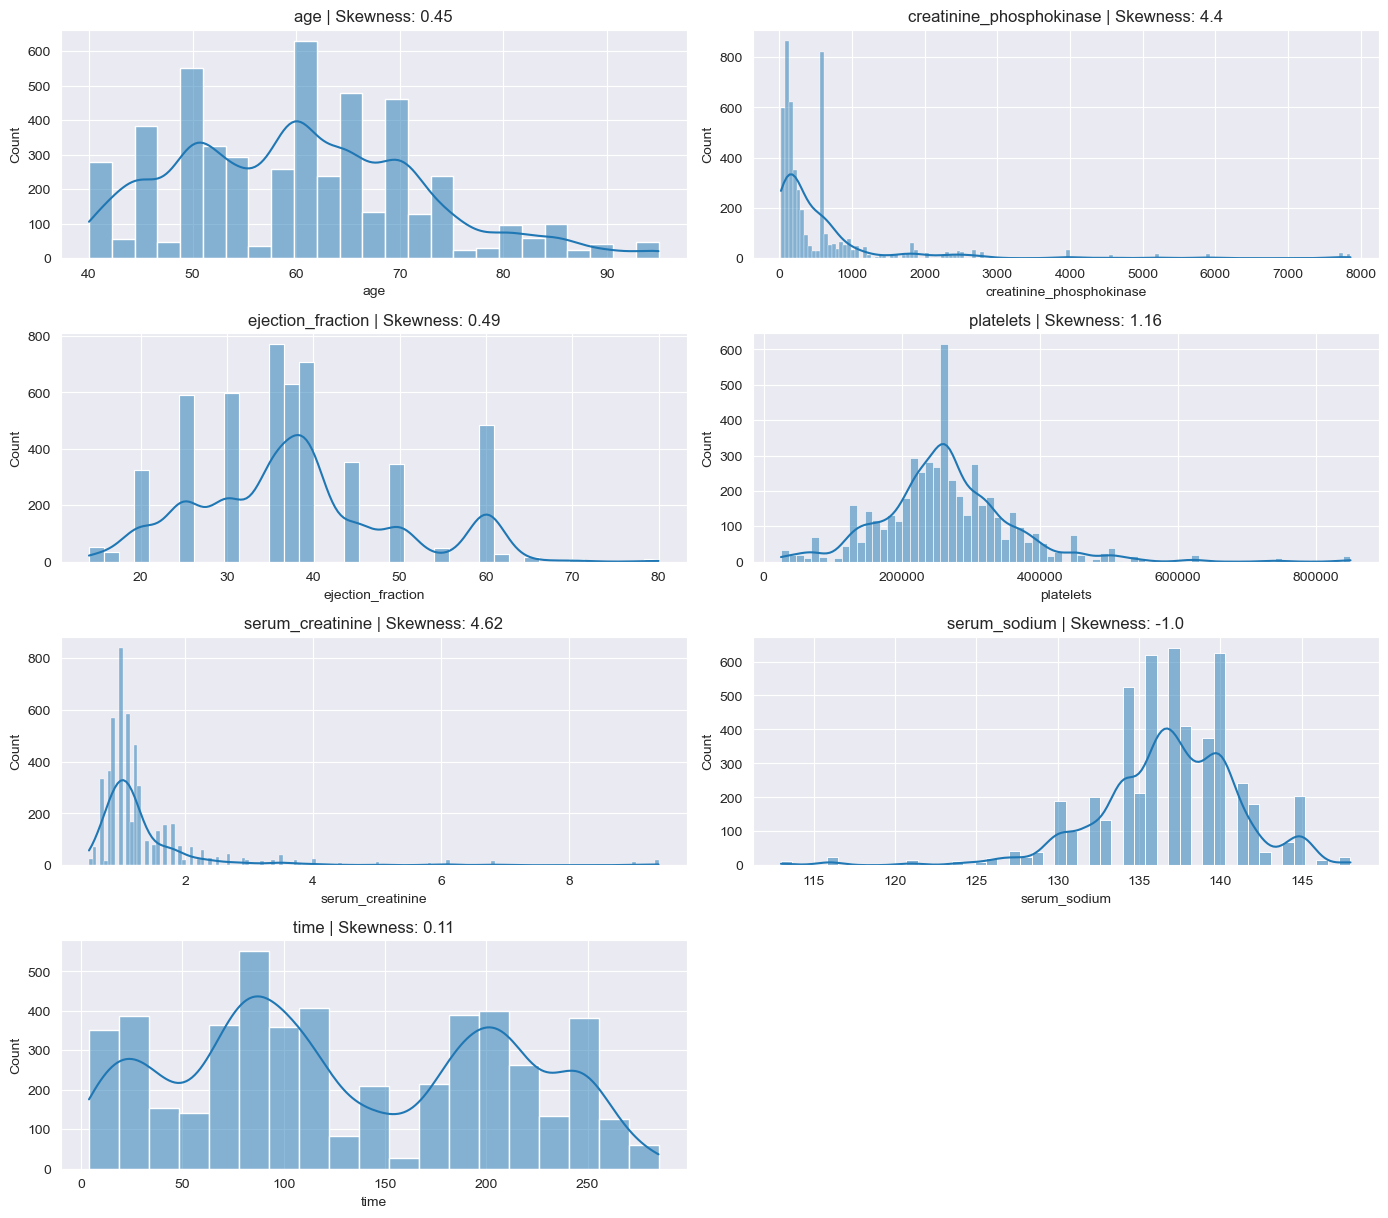

In [20]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [21]:
# Check number of unique values in each numerical columns

for i in numerical_values_col:
    print(f"The number of unique values in {i} are {df.loc[:, i].nunique()}")

The number of unique values in age are 47
The number of unique values in creatinine_phosphokinase are 290
The number of unique values in ejection_fraction are 17
The number of unique values in platelets are 203
The number of unique values in serum_creatinine are 43
The number of unique values in serum_sodium are 27
The number of unique values in time are 155


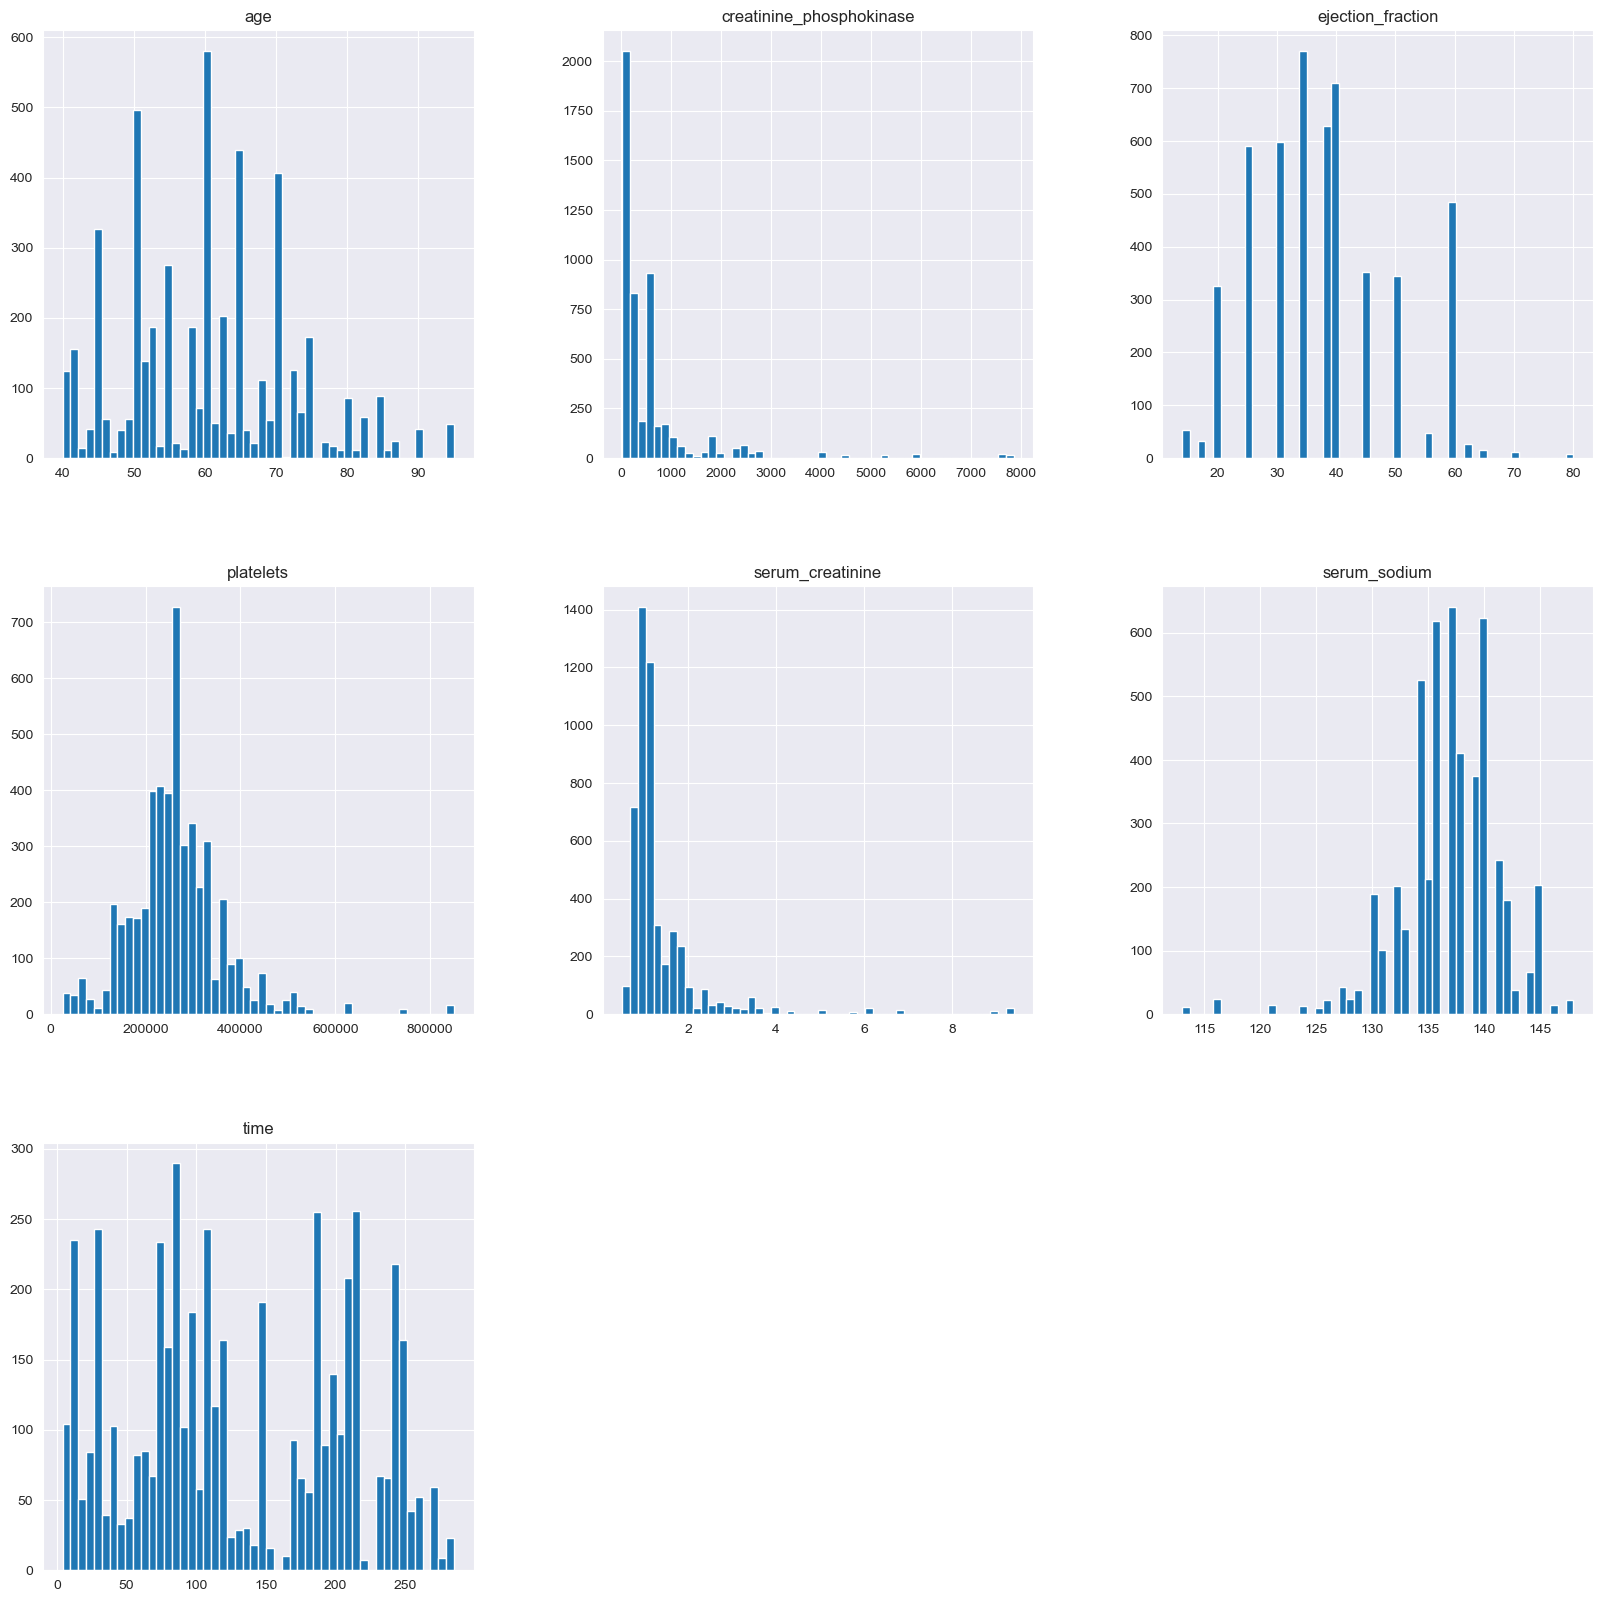

In [22]:
# Visualize the distribution of the numerical values in each column
df.hist(bins=50, figsize=(20, 20))
plt.show()

### Checking value counts for categorical columns and confirming the data type

In [23]:
df['anaemia'].value_counts()

No     2627
Yes    2371
Name: anaemia, dtype: int64

In [24]:
df['diabetes'].value_counts()

No     2797
Yes    2190
Name: diabetes, dtype: int64

In [25]:
df['high_blood_pressure'].value_counts()

No     3167
Yes    1823
Name: high_blood_pressure, dtype: int64

In [26]:
df['sex'].value_counts()

Male      3221
Female    1766
Name: sex, dtype: int64

In [27]:
df['DEATH_EVENT'].value_counts()

No     3429
Yes    1567
Name: DEATH_EVENT, dtype: int64

[Text(0, 0, '3429'), Text(0, 0, '1567')]

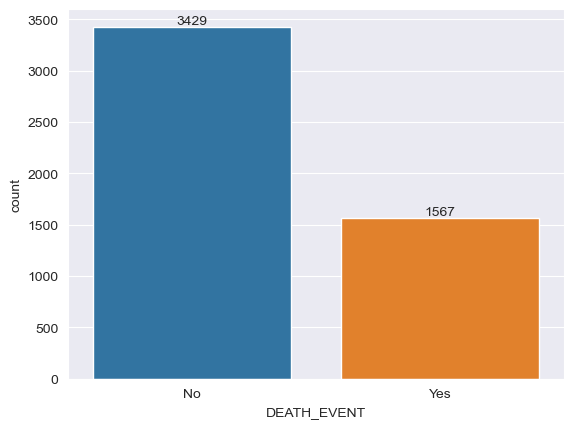

In [28]:
# Visualising the target variable

ax = sns.countplot(x='DEATH_EVENT', data=df)
ax.bar_label(ax.containers[0])

In [29]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

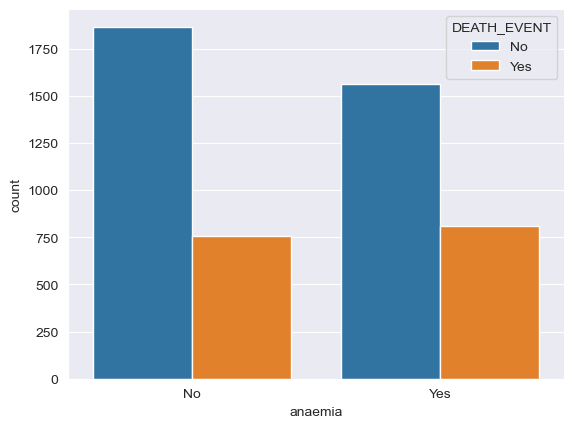

In [30]:
# Showing the distribution of Anaemia against the target variable

ax=sns.countplot(x=df['anaemia'], hue = 'DEATH_EVENT', data=df)

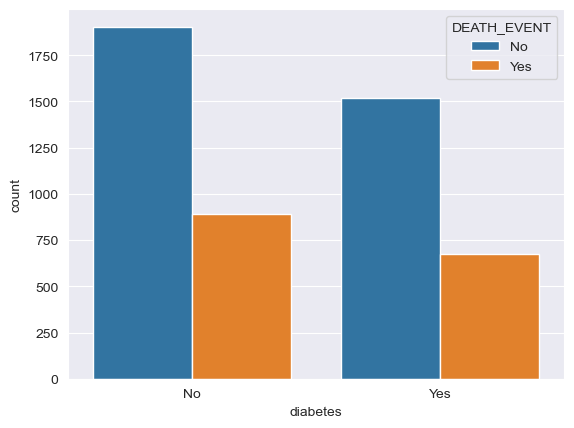

In [31]:
# Showing the distribution of Diabetes against the target variable

ax=sns.countplot(x=df['diabetes'], hue = 'DEATH_EVENT', data=df)

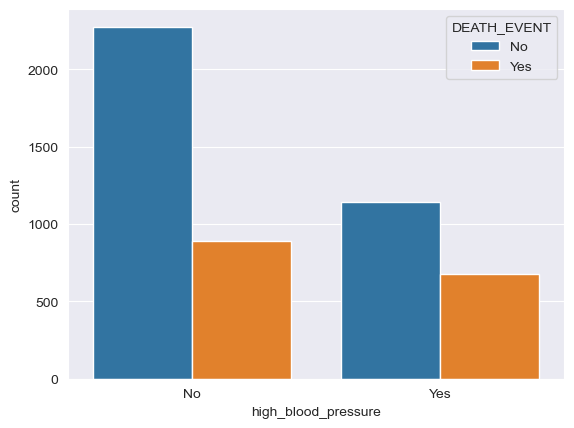

In [32]:
# Showing the distribution of High blood pressure against the target variable

ax=sns.countplot(x=df['high_blood_pressure'], hue = 'DEATH_EVENT', data=df)

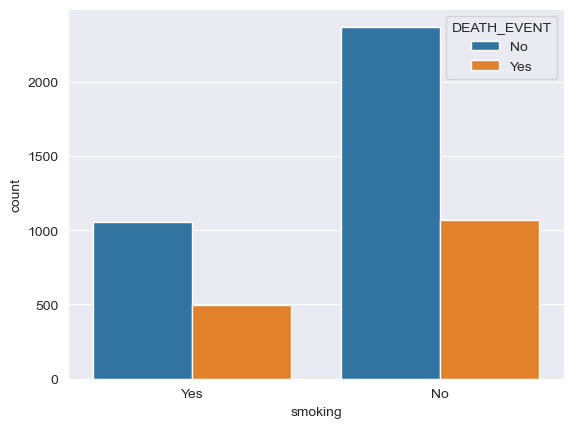

In [33]:
# Showing the distribution of smoking against the target variable

ax=sns.countplot(x=df['smoking'], hue = 'DEATH_EVENT', data=df)

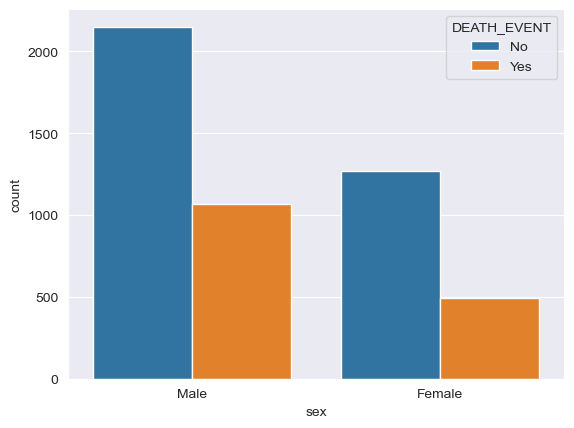

In [34]:
# Showing the distribution of sex against the target variable

ax=sns.countplot(x=df['sex'], hue = 'DEATH_EVENT', data=df)

Text(0.5, 1.0, 'Correlation Heatmap')

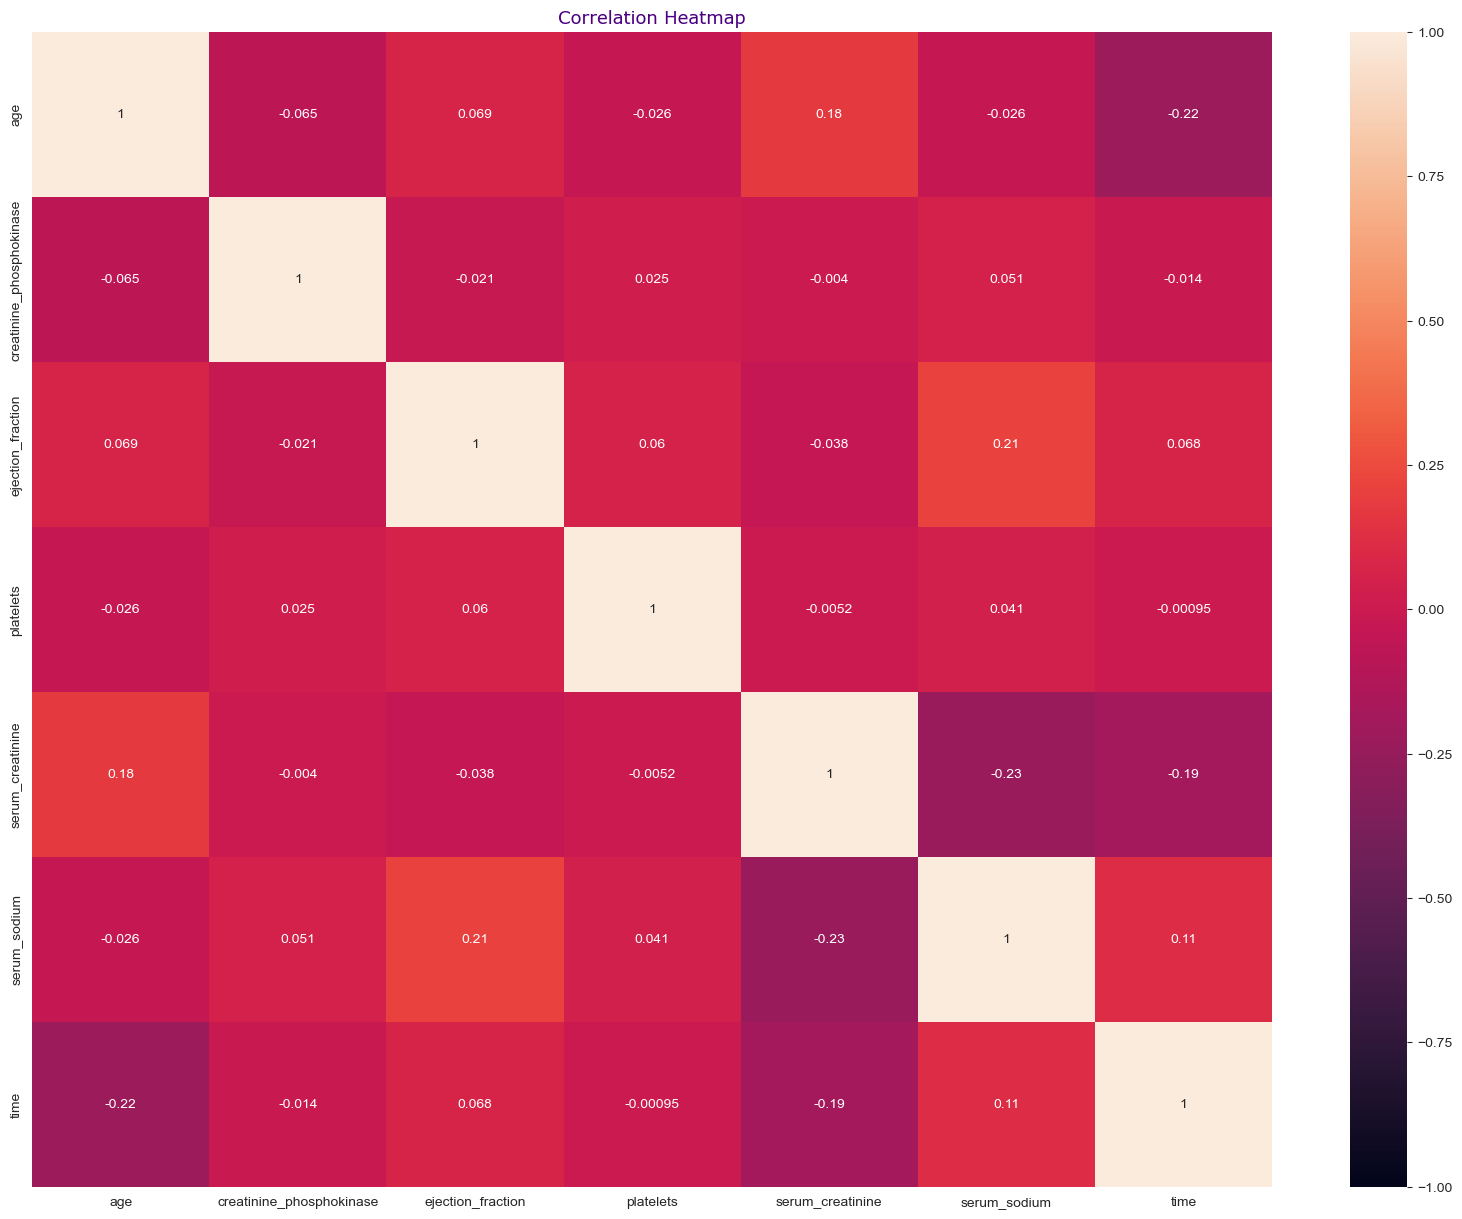

In [35]:
# Heatmap to display the correlation between the numerical values.
number_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
              'serum_creatinine', 'serum_sodium', 'time']

corr_matrix = df[number_cols].corr()
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', color='indigo', font='verdana', fontsize=13)

In [36]:
#Checking to see if their are missing values in the dataset
df.isnull().sum()

age                         46
anaemia                      2
creatinine_phosphokinase     2
diabetes                    13
ejection_fraction            0
high_blood_pressure         10
platelets                   15
serum_creatinine             0
serum_sodium                 0
sex                         13
smoking                      9
time                         1
DEATH_EVENT                  4
dtype: int64

In [37]:
# Feature Engineering

In [38]:
# Filling in missing values

df['age'] = df['age'].fillna(df['age'].median())

#### Median was used for the interpolation of age because using the mean would return a decimal place number.

In [39]:
# Interpolate for the rest of the numerical columns using mean

df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].fillna(df['creatinine_phosphokinase'].mean())

In [40]:
df['time'] = df['time'].fillna(df['time'].mean())

In [41]:
df['platelets'] = df['platelets'].fillna(df['platelets'].mean())

In [42]:
df.isnull().sum()

age                          0
anaemia                      2
creatinine_phosphokinase     0
diabetes                    13
ejection_fraction            0
high_blood_pressure         10
platelets                    0
serum_creatinine             0
serum_sodium                 0
sex                         13
smoking                      9
time                         0
DEATH_EVENT                  4
dtype: int64

In [43]:
# Interpolate the categorical values using mode interpolation

for column in df.select_dtypes(include='object'):
    df[column].fillna(df[column].mode()[0], inplace=True)

In [44]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [45]:
df.shape

(5000, 13)

# ENCONDING

### This helps to transform categorical values to numerical values

In [46]:
# convert categorical values to numerical values

df['anaemia'].replace({'No':0, 'Yes':1}, inplace=True)
df['diabetes'].replace({'No':0, 'Yes':1}, inplace=True)
df['high_blood_pressure'].replace({'No': 0, 'Yes':1},inplace=True)
df['smoking'].replace({'No':0, 'Yes':1 }, inplace=True)
df['sex'].replace({'Female':0, 'Male':1}, inplace=True)
df['DEATH_EVENT'].replace({'No':0, 'Yes':1}, inplace=True)

In [47]:
df.head(7)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748.0,0,45,0,263358.03,1.3,137,1,1,88.0,0
1,65.0,0,56.0,0,25,0,305000.00,5.0,130,1,0,207.0,0
2,45.0,0,582.0,1,38,0,319000.00,0.9,140,0,0,244.0,0
3,60.0,1,754.0,1,40,1,328000.00,1.2,126,1,0,90.0,0
4,95.0,1,582.0,0,30,0,461000.00,2.0,132,1,0,50.0,1
5,70.0,0,232.0,1,30,0,302000.00,1.2,132,1,0,210.0,0
6,63.0,1,122.0,1,60,0,172000.00,1.2,145,0,0,147.0,0


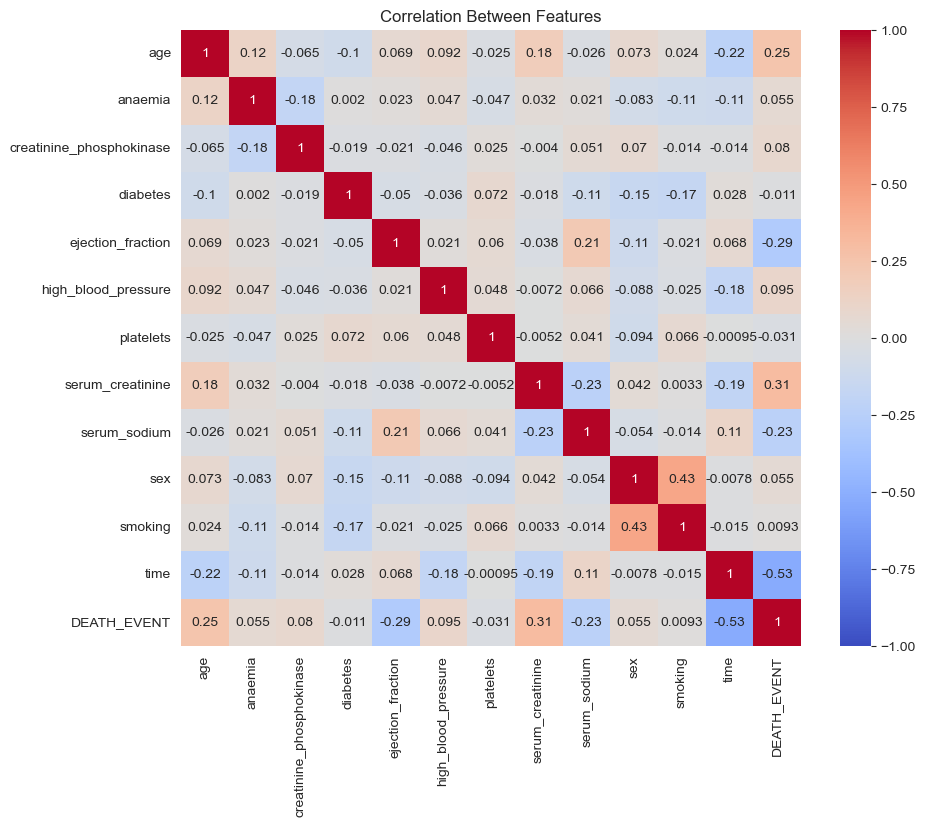

In [48]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Features')
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   float64
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   float64
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 507.9 KB


## Splitting the dataset into  80% Training and 20% Test dataset

In [50]:
# Drop the target variable

X = df.drop(columns='DEATH_EVENT')

In [51]:
# Assign the target variable to y

y = df['DEATH_EVENT']

In [52]:
#Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size=0.20, random_state=42)

### The dataset is balanced on the training dataset to avoid bias

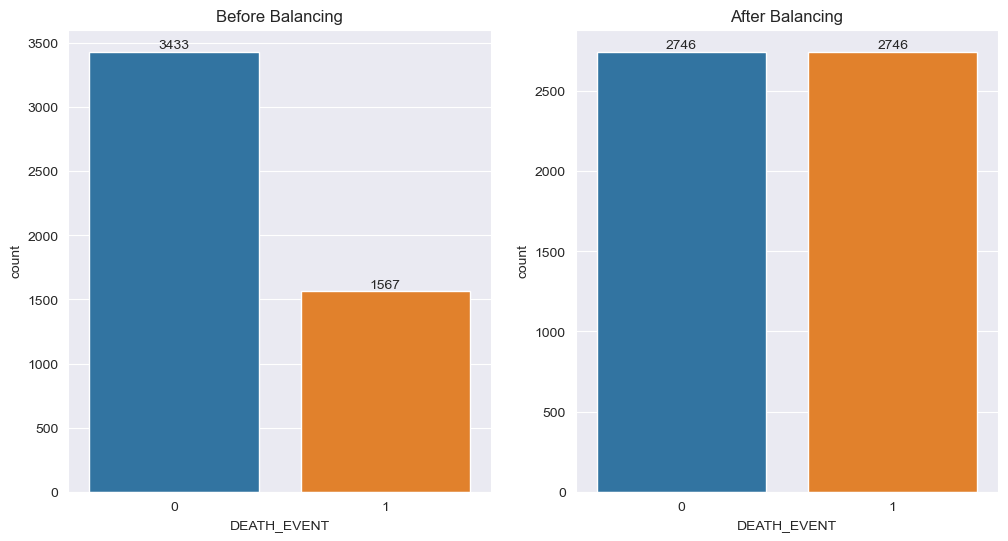

In [53]:
# Balancing the dataset 
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)
df_res = pd.concat([X_train, y_train.rename('DEATH_EVENT')], axis=1)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.countplot(data=df, x='DEATH_EVENT', ax=axs[0])
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Before Balancing')
sns.countplot(data=df_res, x ='DEATH_EVENT', ax=axs[1])
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('After Balancing')

plt.show()

In [54]:
# Standardize the dataset using Standard Scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [55]:
# Checking the shape of the training and test dataset

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_text: {y_test.shape}')

X_train: (5492, 12)
X_test: (1000, 12)
y_train: (5492,)
y_text: (1000,)


# Experiment 1
# Model Implementation

### 5 models were used for this work which are; Logistic Regression, Decision Tree, Gaussian Naive Bayes, Random Forest, K-Nearest Neighbors.

In [56]:
models = {
    'logistic_regression': LogisticRegression(random_state=42, max_iter=1000),
    'decision_tree': DecisionTreeClassifier(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'gaussian_nb': GaussianNB(),
    'knn': KNeighborsClassifier()
}

In [57]:
non_optimized_results = {}

Accuracy for logistic_regression: 0.809
Classification Report for logistic_regression:
              precision    recall  f1-score   support

           0       0.90      0.82      0.85       687
           1       0.66      0.79      0.72       313

    accuracy                           0.81      1000
   macro avg       0.78      0.80      0.79      1000
weighted avg       0.82      0.81      0.81      1000

F1_Score: 0.7219796215429403
Precision: 0.6631016042780749
Recall: 0.792332268370607


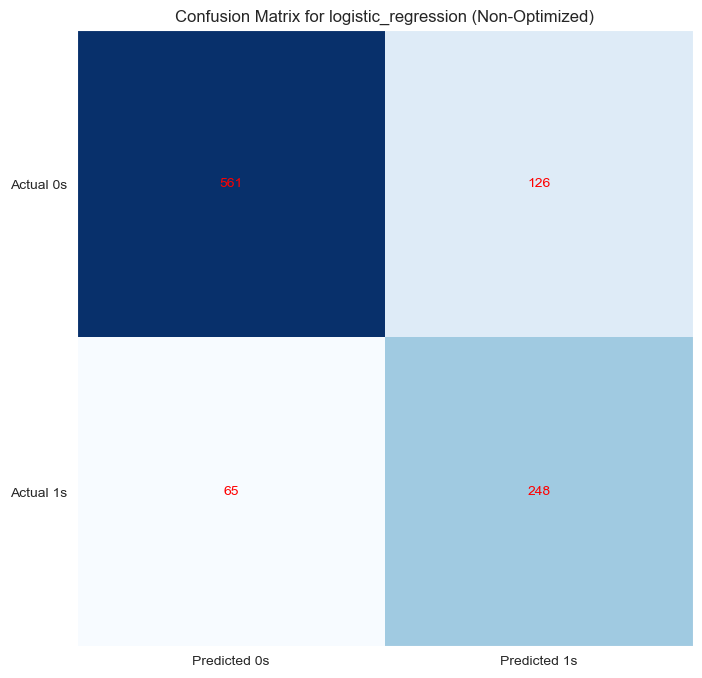

Accuracy for decision_tree: 0.987
Classification Report for decision_tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       687
           1       0.97      0.98      0.98       313

    accuracy                           0.99      1000
   macro avg       0.98      0.99      0.98      1000
weighted avg       0.99      0.99      0.99      1000

F1_Score: 0.9793322734499205
Precision: 0.9746835443037974
Recall: 0.9840255591054313


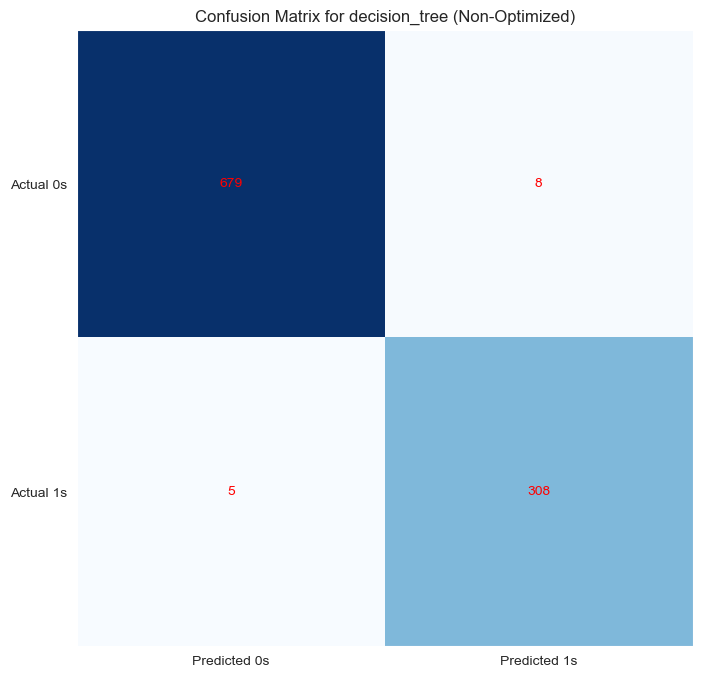

Accuracy for random_forest: 0.992
Classification Report for random_forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       687
           1       0.98      0.99      0.99       313

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

F1_Score: 0.9872611464968153
Precision: 0.9841269841269841
Recall: 0.9904153354632588


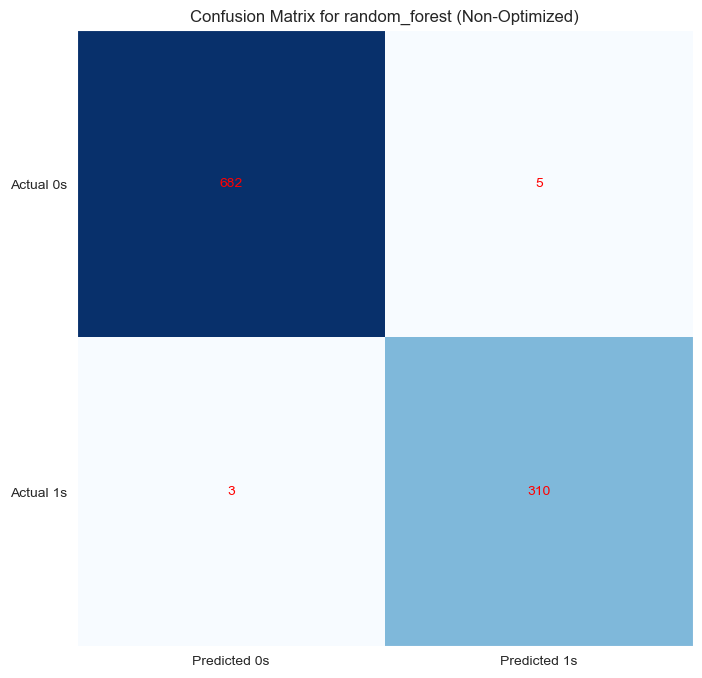

Accuracy for gaussian_nb: 0.846
Classification Report for gaussian_nb:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       687
           1       0.80      0.68      0.74       313

    accuracy                           0.85      1000
   macro avg       0.83      0.80      0.81      1000
weighted avg       0.84      0.85      0.84      1000

F1_Score: 0.7353951890034365
Precision: 0.7955390334572491
Recall: 0.6837060702875399


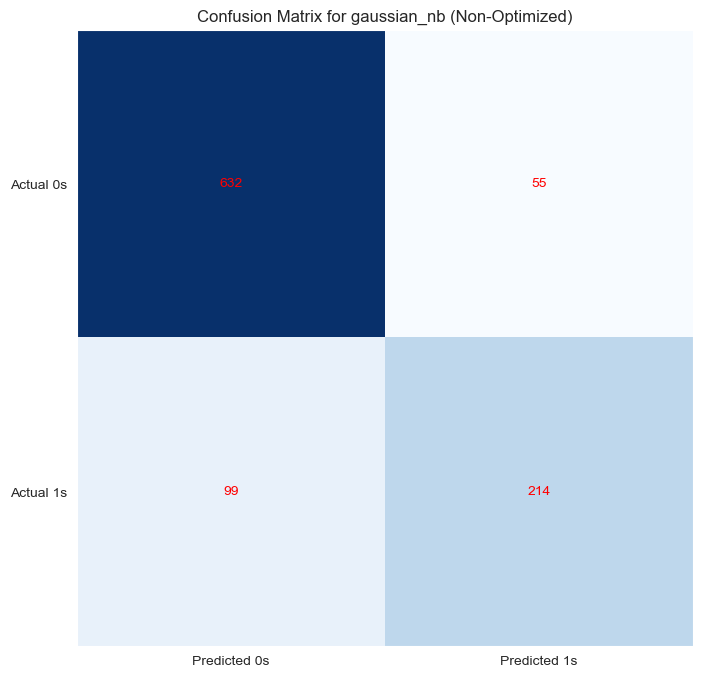

Accuracy for knn: 0.975
Classification Report for knn:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       687
           1       0.95      0.97      0.96       313

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.98      0.97      0.98      1000

F1_Score: 0.9605055292259084
Precision: 0.95
Recall: 0.9712460063897763


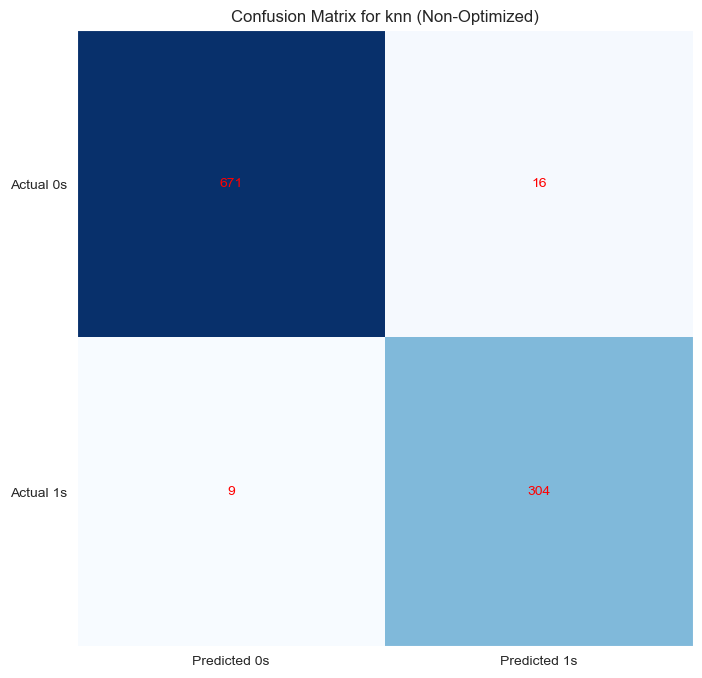

In [58]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    re = recall_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    non_optimized_results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'f1_score': f1,
        'recall_score': re,
        'precision_score': pre,
        'classification_report': class_report,
    }
    print(f"Accuracy for {model_name}: {accuracy}")
    print(f"Classification Report for {model_name}:\n{class_report}")
    print(f"F1_Score: {f1}")
    print(f"Precision: {pre}")
    print(f"Recall: {re}")
        # Draw confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(conf_matrix, cmap=plt.cm.Blues)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')
    plt.title(f'Confusion Matrix for {model_name} (Non-Optimized)')
    plt.show()

In [59]:
# Model Comparison

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier()

model_list = [lr, dt, rf, gnb, knn]
train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(X_train, y_train)
    y_train_pred = i_model.predict(X_train)
    y_pred = i_model.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_pred))

model_summary = pd.DataFrame({'Model':model_list, 'Train Score': train_acc, 'Test Score':test_acc})
print(model_summary)


                                               Model  Train Score  Test Score
0                               LogisticRegression()     0.812272       0.809
1                           DecisionTreeClassifier()     0.999636       0.981
2  (DecisionTreeClassifier(max_features='sqrt', r...     0.999636       0.992
3                                       GaussianNB()     0.793154       0.846
4                             KNeighborsClassifier()     0.978150       0.975


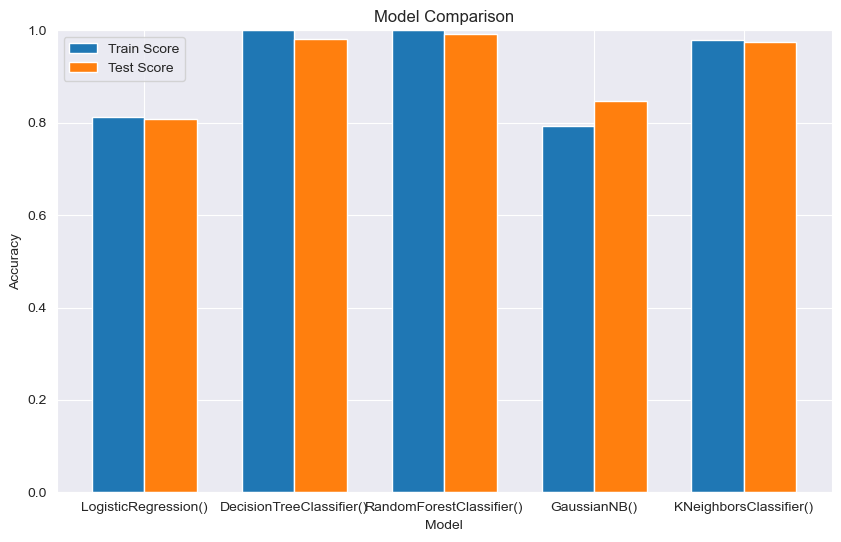

In [60]:
# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(model_summary))

bar1 = ax.bar(index, model_summary['Train Score'], bar_width, label='Train Score')
bar2 = ax.bar([i + bar_width for i in index], model_summary['Test Score'], bar_width, label='Test Score')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(model_summary['Model'])
ax.legend()

plt.ylim(0, 1)
plt.show()

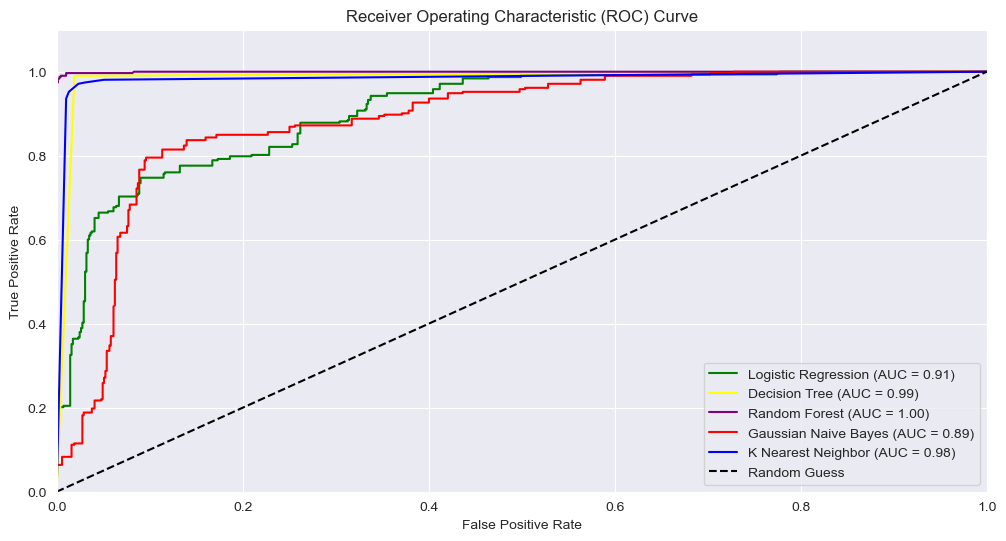

In [64]:
# Create ROC curve for all the models

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 
               'Gaussian Naive Bayes', 'K Nearest Neighbor']
colors = ['green', 'yellow', 'purple', 'red', 'blue']

plt.figure(figsize=(12,6))

for i, model in enumerate(model_list):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:  
        y_pred_prob = model.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Experiment 2
# Model Optimization
### The rationale behind this experiment is to investigate and validate that model optimization is expedient in machine learning.

## Using Anova to select features. 
### Anova was used for feature selection because only feature with statistical significance to the target variable are of interest in this research work
#### The P-value is used to determine the statistical significance. A low P-value (typically < 0.05) indicates that the difference between group means is statistically significant.

In [65]:
f_values, p_values = f_classif(X_train, y_train)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})
anova_results = anova_results.sort_values(by='P-Value')
significant_features = anova_results[anova_results['P-Value'] < 0.05]['Feature'].tolist()
print(f'The selected features are: {significant_features}')   

The selected features are: ['time', 'ejection_fraction', 'serum_creatinine', 'age', 'serum_sodium', 'creatinine_phosphokinase', 'high_blood_pressure', 'sex', 'platelets', 'anaemia', 'diabetes']


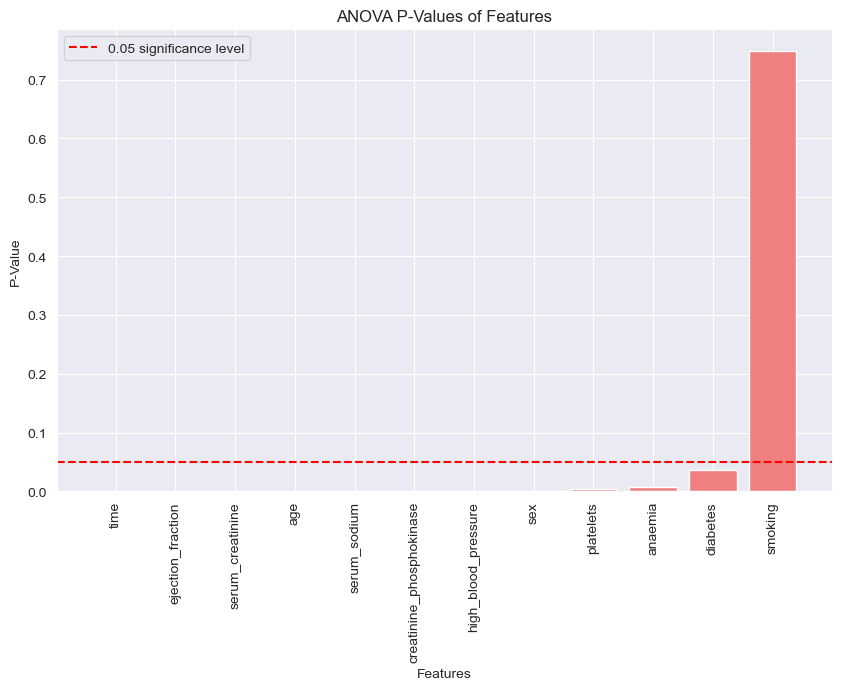

In [66]:
# Plotting P-Values
plt.figure(figsize=(10, 6))
plt.bar(anova_results['Feature'], anova_results['P-Value'], color='lightcoral')
plt.axhline(y=0.05, color='r', linestyle='--', label='0.05 significance level')
plt.title('ANOVA P-Values of Features')
plt.xlabel('Features')
plt.ylabel('P-Value')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [67]:
# Filter significant features
X_significant = pd.DataFrame(X_train, columns = X.columns)[significant_features]

In [68]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_significant)

In [69]:
### Principal Component Analysis was used inorder to deal with overfitting. 

In [70]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

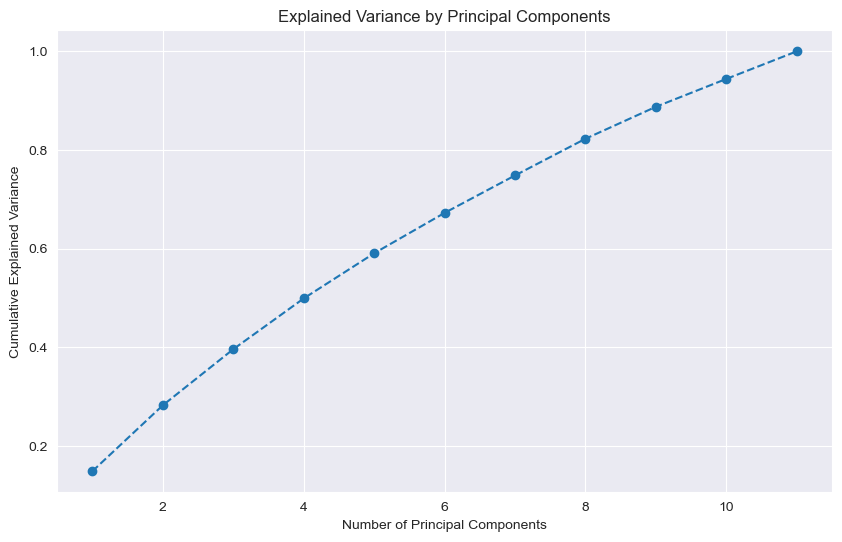

In [71]:
# Plot the explained variance ratio to decide the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [72]:
# Choosing a number of components that explain a sufficient amount of variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f'Number of components explaining 95% variance: {n_components}')

Number of components explaining 95% variance: 11


In [73]:
# Transforming the data using the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [74]:
X_pca.shape

(5492, 11)

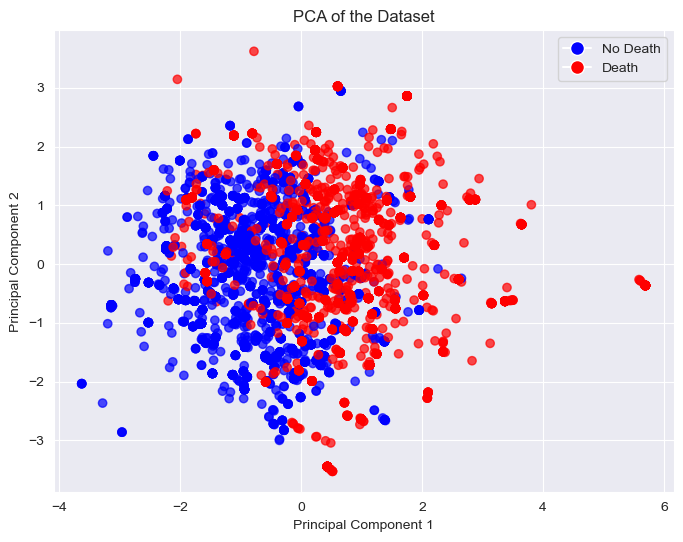

In [75]:
# Define colors for the binary target variable
colors = ['blue' if label == 0 else 'red' for label in y_train]

# Visualizing the data in the new feature space
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Dataset')

# Create custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Death'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Death')]

plt.legend(handles=handles)

plt.show()

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_train, test_size=0.2, random_state=42)

In [77]:
X_pca.shape
#y_train.shape

(5492, 11)

In [78]:
# Balancing the dataset 
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [79]:
# Defining the parameter grids for each model
param_grids = {
    'logistic_regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'decision_tree': {
        'max_depth': [10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'random_forest': {
        'n_estimators': [100, 200, 300],
        'max_depth':  [10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'gaussian_nb': {},
    'knn': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}


In [80]:
best_models = {}
best_params = {}
best_scores = {}

In [81]:
# Perform GridSearchCV for each model
for model_name in models:
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name],
                               cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(X_train_res, y_train_res)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    best_scores[model_name] = grid_search.best_score_
    print(f"Best Parameters for {model_name}: {best_params[model_name]}")
    print(f"Best Cross-Validation Score for {model_name}: {best_scores[model_name]}")

Tuning logistic_regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for logistic_regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score for logistic_regression: 0.8190061019753854
Tuning decision_tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for decision_tree: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score for decision_tree: 0.96589590443686
Tuning random_forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for random_forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score for random_forest: 0.9747634191746821
Tuning gaussian_nb...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for gaussian_nb: {}
Best Cross-Validation Score for gaussian_nb: 0.8256042506981073
Tuning knn...
Fitting 5 folds for each

In [82]:
optimized_results = {}

Evaluating logistic_regression after optimization...
Accuracy for logistic_regression: 0.816196542311192
Confusion Matrix for logistic_regression:
[[449  98]
 [104 448]]
F1_Score: 0.8160291438979964
Precision: 0.8205128205128205
Recall: 0.8115942028985508
Classification Report for logistic_regression:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       547
           1       0.82      0.81      0.82       552

    accuracy                           0.82      1099
   macro avg       0.82      0.82      0.82      1099
weighted avg       0.82      0.82      0.82      1099



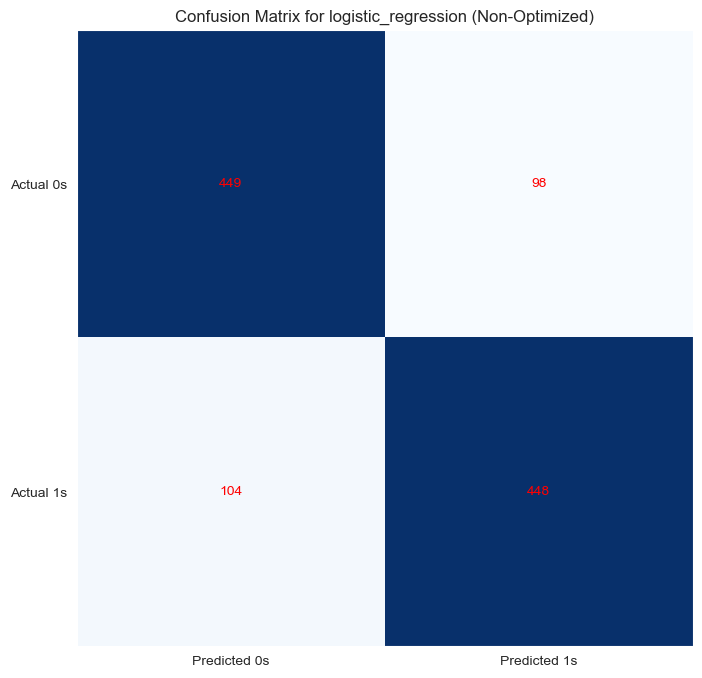

Evaluating decision_tree after optimization...
Accuracy for decision_tree: 0.9745222929936306
Confusion Matrix for decision_tree:
[[538   9]
 [ 19 533]]
F1_Score: 0.9744058500914076
Precision: 0.9833948339483395
Recall: 0.9655797101449275
Classification Report for decision_tree:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       547
           1       0.98      0.97      0.97       552

    accuracy                           0.97      1099
   macro avg       0.97      0.97      0.97      1099
weighted avg       0.97      0.97      0.97      1099



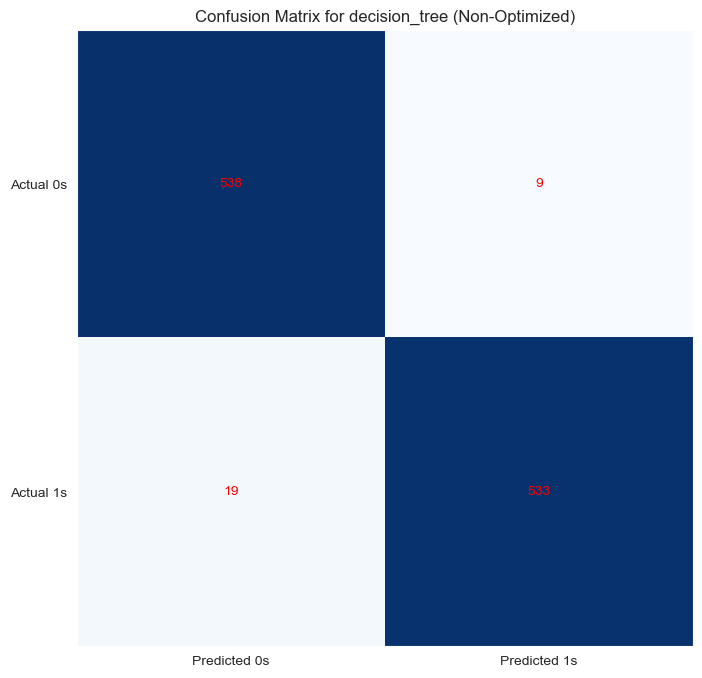

Evaluating random_forest after optimization...
Accuracy for random_forest: 0.9845313921747043
Confusion Matrix for random_forest:
[[539   8]
 [  9 543]]
F1_Score: 0.9845874886672712
Precision: 0.985480943738657
Recall: 0.9836956521739131
Classification Report for random_forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       547
           1       0.99      0.98      0.98       552

    accuracy                           0.98      1099
   macro avg       0.98      0.98      0.98      1099
weighted avg       0.98      0.98      0.98      1099



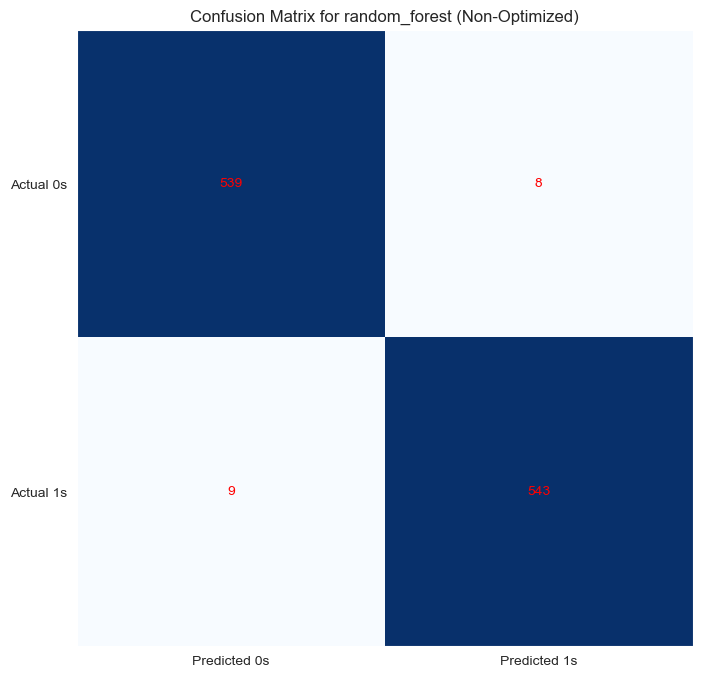

Evaluating gaussian_nb after optimization...
Accuracy for gaussian_nb: 0.8262056414922657
Confusion Matrix for gaussian_nb:
[[468  79]
 [112 440]]
F1_Score: 0.8216619981325863
Precision: 0.8477842003853564
Recall: 0.7971014492753623
Classification Report for gaussian_nb:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       547
           1       0.85      0.80      0.82       552

    accuracy                           0.83      1099
   macro avg       0.83      0.83      0.83      1099
weighted avg       0.83      0.83      0.83      1099



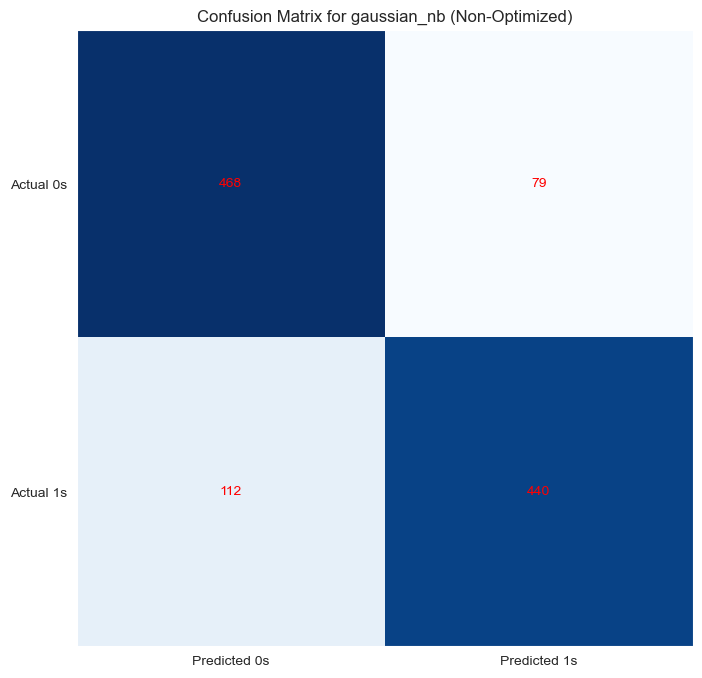

Evaluating knn after optimization...
Accuracy for knn: 0.9845313921747043
Confusion Matrix for knn:
[[541   6]
 [ 11 541]]
F1_Score: 0.9845313921747042
Precision: 0.9890310786106032
Recall: 0.980072463768116
Classification Report for knn:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       547
           1       0.99      0.98      0.98       552

    accuracy                           0.98      1099
   macro avg       0.98      0.98      0.98      1099
weighted avg       0.98      0.98      0.98      1099



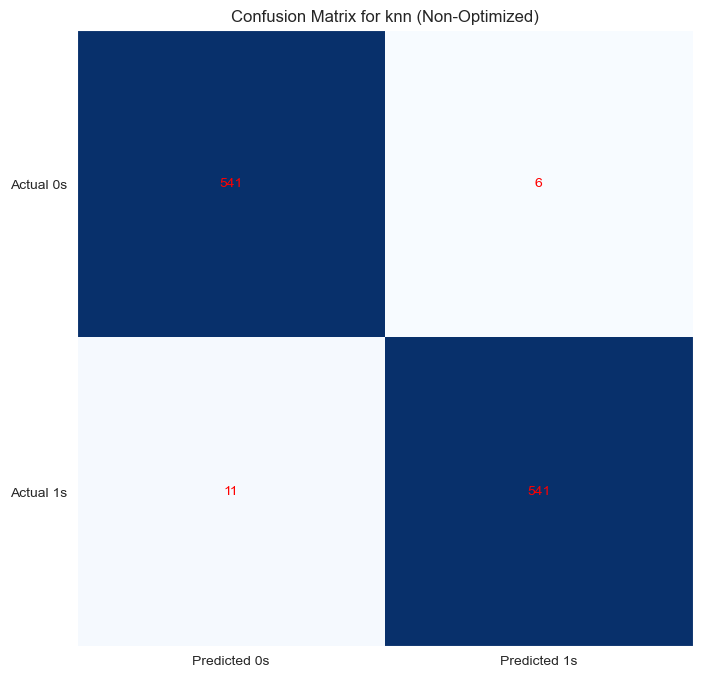

In [83]:
for model_name, model in best_models.items():
    print(f"Evaluating {model_name} after optimization...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    re = recall_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    optimized_results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'f1_score': f1,
        'precision_score': pre,
        'recall_score': re,
        'classification_report': class_report
    }
    print(f"Accuracy for {model_name}: {accuracy}")
    print(f"Confusion Matrix for {model_name}:\n{conf_matrix}")
    print(f"F1_Score: {f1}")
    print(f"Precision: {pre}")
    print(f"Recall: {re}")
    print(f"Classification Report for {model_name}:\n{class_report}")
   
    # Draw confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(conf_matrix, cmap=plt.cm.Blues)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')
    plt.title(f'Confusion Matrix for {model_name} (Non-Optimized)')
    plt.show()

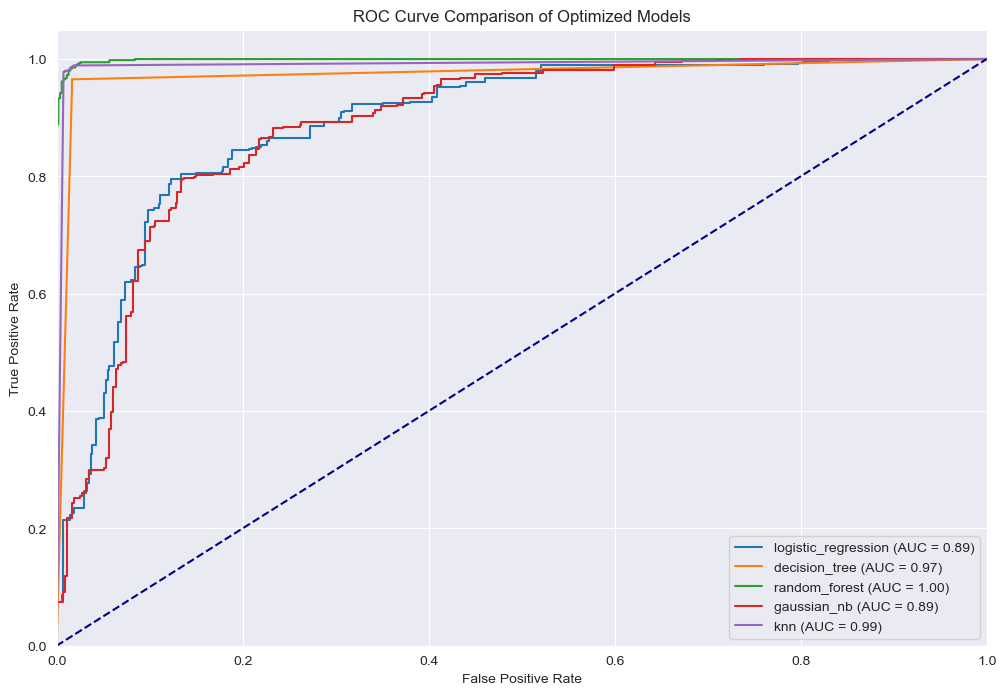

[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................

[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ma

[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END max_depth=10, min_s

[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10,

[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END max_depth=10, min_s

[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] E

In [86]:
# Plotting the ROC curve for all optimized models
plt.figure(figsize=(12, 8))

for model_name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:  
        y_pred_prob = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Optimized Models')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_names = list(models.keys())
non_optimized_accuracies = [non_optimized_results[model]['accuracy'] for model in model_names]
optimized_accuracies = [optimized_results[model]['accuracy'] for model in model_names]

In [494]:
# Plotting the histogram
x = np.arange(len(model_names))  # the label locations
width = 0.35

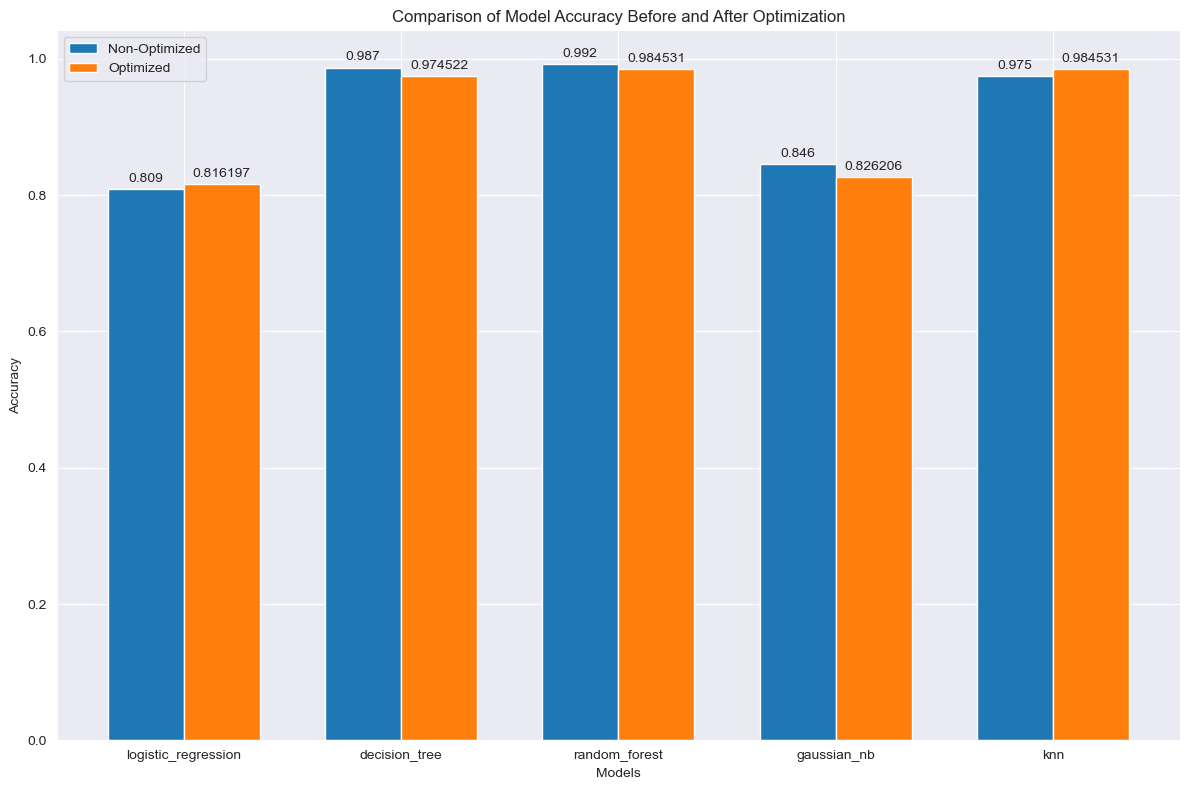

In [495]:
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, non_optimized_accuracies, width, label='Non-Optimized')
rects2 = ax.bar(x + width/2, optimized_accuracies, width, label='Optimized')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracy Before and After Optimization')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Add labels to bars
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [496]:
non_optimized_metrics = {model: (non_optimized_results[model]['precision_score'],
                                 non_optimized_results[model]['recall_score'],
                                 non_optimized_results[model]['f1_score']) 
                         for model in non_optimized_results.keys()}

In [497]:
# Extract metrics for optimized models
optimized_metrics = {model: (optimized_results[model]['precision_score'],
                             optimized_results[model]['recall_score'],
                             optimized_results[model]['f1_score']) 
                     for model in optimized_results.keys()}

In [498]:
# Prepare data for plotting
model_names = list(optimized_results.keys())
metric_names = ['Precision', 'Recall', 'F1-Score']

In [499]:
non_optimized_data = np.array([non_optimized_metrics[model] for model in model_names]).T
optimized_data = np.array([optimized_metrics[model] for model in model_names]).T

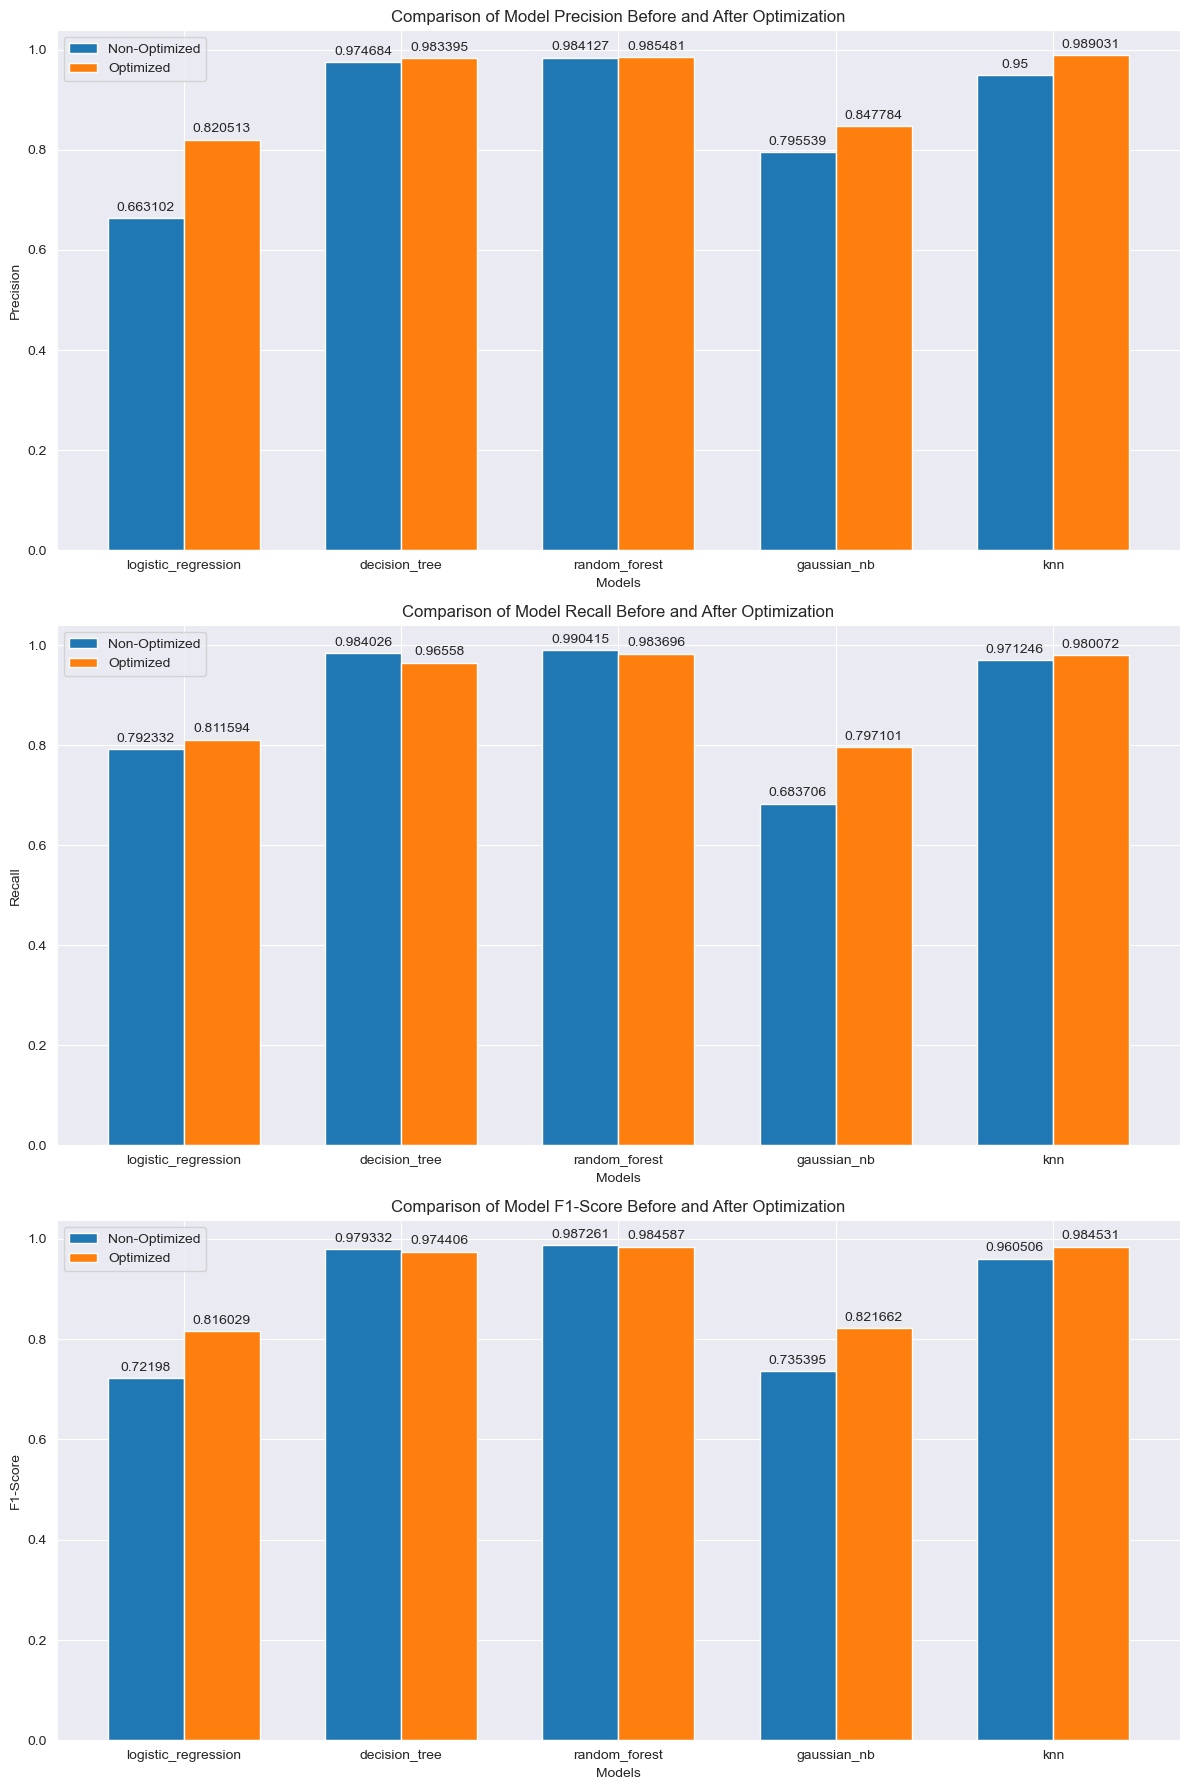

In [500]:
# Plotting the histograms
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

for i, metric in enumerate(metric_names):
    x = np.arange(len(model_names))
    width = 0.35

    rects1 = axs[i].bar(x - width/2, non_optimized_data[i], width, label='Non-Optimized')
    rects2 = axs[i].bar(x + width/2, optimized_data[i], width, label='Optimized')

    axs[i].set_xlabel('Models')
    axs[i].set_ylabel(metric)
    axs[i].set_title(f'Comparison of Model {metric} Before and After Optimization')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(model_names)
    axs[i].legend()

    axs[i].bar_label(rects1, padding=3)
    axs[i].bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

In [502]:
# Model Comparison

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier()

model_list = [lr, dt, rf, gnb, knn]
train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(X_train, y_train)
    y_train_pred = i_model.predict(X_train)
    y_pred = i_model.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_pred))

model_summary = pd.DataFrame({'Model':model_list, 'Train Score': train_acc, 'Test Score':test_acc})
print(model_summary)

                                               Model  Train Score  Test Score
0                               LogisticRegression()     0.812429    0.818016
1                           DecisionTreeClassifier()     0.999545    0.970883
2  (DecisionTreeClassifier(max_features='sqrt', r...     0.999545    0.982712
3                                       GaussianNB()     0.825632    0.827116
4                             KNeighborsClassifier()     0.977692    0.978162


### From the experiment conducted, After optimization, all the algorithms showed an improvement either in terms of Recall, Precision, Accuracy and F1-Score.

### For F1-Score, KNN was the best performing model.
### For Recall, Random forest model was the best performing
### For Precision, KNN was the best performing model
### And for Accuracy, Random Forest was the best performing.